In [2]:
import pandas
import numpy
import urllib
import bs4
import re
from urllib import request
import os

# Les incendies en Corse depuis 1976 : éléments déclencheurs et facteurs aggravants

## Introduction

La Corse a toujours été l'une des régions françaises les plus durement touchées par les incendies. Jusqu'en 1985, les superficies brûlées étaient d'en moyenne 10 000 ha par an (source : _Battesti Antoine_, __Les incendies en Corse__ in Méditerranée, tome 72, 1-1991. Les grandes îles de la Méditerranée occidentale. pp. 39-42). Depuis plusieurs années on semble assister à une baisse des départs de feux mais aussi à un réduction des surfaces brûlées chaque année.

### Problématique

Alors que moins de 10% des incendies en France ont des causes naturelles il apparait essentiel de questionnier les activités humaines et le rôle qu'elles jouent dans les incendies. Dans quelle mesure ces activités humaines sont-elles responsables des dégats causés par le feu ? On distinguera pour cela deux aspects de l'incendie : le départ du feu (sa cause, ses circonstances) et son développement (le nombre d'hectares parcourus). Nous tenterons donc d'expliquer ces deux aspects à la fois par des facteurs "humains" (données socio-économiques, campagnes de prévention) et des facteurs "naturels" (climat, végétation).

## Récupération des données

Dans cette partie nous allons réunir l'ensemble des données nécessaire à l'étude que nous entreprenons de mener. Nous allons pour cela utiliser plusieurs bases :
 - La __base de données Prométhée__ pour les incendies avec leur date, leur localisation et la surface parcourue par chacun.
 - La base __Opendata Corsica__ des forêts territoriales et les données du __Schéma Régional d'Aménagement__ qui serviront à nous donner des informations sur les principales forêts de l'île.
 - Les données socio-économiques de chaque commune issues du __Comparateur de territoire de l'INSEE__.
 - Les données climatiques issues des bases de données __SYNOP de Méteo France__.

### Base de données Prométhée

La base de données "Prométhée" est la base de données officielle pour les incendies de forêts dans la zone méditerranéenne française. Elle répertorie tous les feux de forêt dans les départements du bassin méditerranéen depuis 1976. Cette base se présente sous la forme d'un fichier _.csv_ que l'on obtient au moyen d'un rapide _export_ depuis le site http://www.promethee.com puis que l'on transforme en _.xlsx_ sans déperdition de données (les données étant dans des cellules différentes). Il s'agit ensuite de convertir le fichier en _DataFrame_ pour pouvoir l'utiliser sur Python. Nous ne travaillerons ici que sur les départements de Haute-Corse et de Corse du Sud.

In [3]:
base = pandas.read_excel("liste_incendies.xlsx", header=2, encoding = "latin")
base = base[ (base.Departement == "2A") | (base.Departement == "2B") ].sort_values(by=['Année']).reset_index(drop=True)

In [4]:
base

,Année,Numéro,Type de feu,Departement,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,Alerte,Origine de l'alerte,Surface parcourue (m2)
0,1976,1172,0,2A,2A209,Peri,PERI,T04D25,1976-04-04 16:10:00,NaN,2000
1,1976,1719,0,2B,2B218,Piedicorte-di-Gaggio,PIEDICORTE DI GAGGIO,T05Q14,1976-09-20 13:35:00,NaN,20000
2,1976,1266,0,2A,2A041,Bonifacio,BONIFACIO,T08K17,1976-07-26 14:04:00,NaN,9000
3,1976,1518,0,2B,2B261,Rogliano,ROGLIANO,T01P18,1976-08-25 11:05:00,NaN,15000
4,1976,1718,0,2B,2B030,Barrettali,BARRETTALI,T01M16,1976-09-20 13:30:00,NaN,30000
5,1976,1265,0,2A,2A247,Porto-Vecchio,PORTO VECCHIO,T07C15,1976-07-26 14:04:00,NaN,2000
6,1976,1519,0,2B,2B079,Castello-di-Rostino,CASTELLO DI ROSTINO,T03T13,1976-08-25 12:40:00,NaN,95000
7,1976,1264,0,2B,2B134,Île-Rousse (L'),ILE ROUSSE L,T02S26,1976-07-26 13:30:00,NaN,1000
8,1976,1182,0,2B,2B313,San-Nicolao,SAN NICOLAO,T03D21,1976-05-19 02:00:00,NaN,30000
9,1976,1717,0,2B,2B096,Corte,CORTE,T03B07,1976-09-20 13:00:00,NaN,20000


Nous rajoutons ici une colonne "Nom de la commune (Code INSEE)" que nous utiliserons par la suite :

In [19]:
base['Nom de la commune (Code INSEE)']=base['Commune'].map(str)+' ('+base['Code INSEE']+')'
base

,Année,Numéro,Type de feu,Departement,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,Alerte,Origine de l'alerte,Surface parcourue (m2),Nom de la commune (Code INSEE)
0,1976,1172,0,2A,2A209,Peri,PERI,T04D25,1976-04-04 16:10:00,NaN,2000,Peri (2A209)
1,1976,1719,0,2B,2B218,Piedicorte-di-Gaggio,PIEDICORTE DI GAGGIO,T05Q14,1976-09-20 13:35:00,NaN,20000,Piedicorte-di-Gaggio (2B218)
2,1976,1266,0,2A,2A041,Bonifacio,BONIFACIO,T08K17,1976-07-26 14:04:00,NaN,9000,Bonifacio (2A041)
3,1976,1518,0,2B,2B261,Rogliano,ROGLIANO,T01P18,1976-08-25 11:05:00,NaN,15000,Rogliano (2B261)
4,1976,1718,0,2B,2B030,Barrettali,BARRETTALI,T01M16,1976-09-20 13:30:00,NaN,30000,Barrettali (2B030)
5,1976,1265,0,2A,2A247,Porto-Vecchio,PORTO VECCHIO,T07C15,1976-07-26 14:04:00,NaN,2000,Porto-Vecchio (2A247)
6,1976,1519,0,2B,2B079,Castello-di-Rostino,CASTELLO DI ROSTINO,T03T13,1976-08-25 12:40:00,NaN,95000,Castello-di-Rostino (2B079)
7,1976,1264,0,2B,2B134,Île-Rousse (L'),ILE ROUSSE L,T02S26,1976-07-26 13:30:00,NaN,1000,Île-Rousse (L') (2B134)
8,1976,1182,0,2B,2B313,San-Nicolao,SAN NICOLAO,T03D21,1976-05-19 02:00:00,NaN,30000,San-Nicolao (2B313)
9,1976,1717,0,2B,2B096,Corte,CORTE,T03B07,1976-09-20 13:00:00,NaN,20000,Corte (2B096)


### Base de donnée Opendata Corsica

Ensuite nous avons besoin de données sur la localisation des forêts corses. La Collectivité Territoriale de Corse met à notre disposition une telle base de données (https://www.data.gouv.fr/fr/datasets/forets-de-corse/). De même que la base précédente, celle-ci est un format _.csv_ que l'on transforme en _.xlsx_ qui est ensuite lisible aisément pas Python. Nous avons donc la surface (en ha) qu'occupe chaque forêt sur les communes concernées. Ces données ne concernent que les __forêts territoriales__ sur lesquelles nous nous concentrerons (peu de données existent sur les forêts communales corses).

In [5]:
base_foret = pandas.read_excel("surfaceforet.xlsx").rename(index=str,columns={'foret_territoriale' : 'Nom de la forêt','communes_de_situation' : 'Communes de situation', 'surface_cadastrale_ha' : 'Surface cadastrale (ha)'}).replace({'√Ø': 'ï','√®':'è','√è': 'Ï'}, regex=True).sort_values(by=['Nom de la forêt']).reset_index(drop=True)
base_foret.head()

,Nom de la forêt,Communes de situation,Surface cadastrale (ha)
0,AÏTONE,Evisa,2383.4500
1,AÏTONE,Cristinacce,21.3000
2,BAVELLA-SAMBUCU,Sari-Solenzara,876.3379
3,BAVELLA-SAMBUCU,Zonza,43.3000
4,BAVELLA-SAMBUCU,Quenza,905.2206


### Données issues du Schéma Régional d'Aménagement

En 2012, l'Assemblée de Corse a approuvé un Schéma Régional d'Aménagement en ce qui concerne les forêts territoriales de l'île et produisant un document éponyme (http://www.haute-corse.gouv.fr/forets-publiques-de-corse-le-schema-regional-d-a479.html). Ce document au format PDF comprend notamment les essences présentes dans chaque forêt ainsi que la proportion qu'elles occupent dans ladite forêt. Nous allons donc utiliser la librairie __PDFMiner__ pour obtenir ces quelques informations.

In [6]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal
from pdfminer.layout import LAParams

document = open('deliberation_62_ac.pdf', 'rb')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

for page in PDFPage.get_pages(document):
    interpreter.process_page(page)
    layout = device.get_result()
    for element in layout:
        if isinstance(element, LTTextBoxHorizontal) :
            print(element)

<LTTextBoxHorizontal(0) 72.640,771.776,216.376,788.420 'ASSEMBLEE DE CORSE \n'>
<LTTextBoxHorizontal(1) 126.160,757.856,163.096,774.500 '_____ \n'>
<LTTextBoxHorizontal(2) 142.960,744.176,146.296,760.820 ' \n'>
<LTTextBoxHorizontal(3) 126.880,730.256,471.976,746.900 'DELIBERATION N° 12/062 AC DE L’ASSEMBLEE DE CORSE \n'>
<LTTextBoxHorizontal(4) 70.960,716.576,527.656,733.220 'APPROUVANT LES PLANS D’AMENAGEMENTS DES FORÊTS TERRITORIALES \n'>
<LTTextBoxHorizontal(5) 70.960,675.056,74.296,691.028 ' \n'>
<LTTextBoxHorizontal(6) 266.560,702.656,332.296,719.300 'DE CORSE \n'>
<LTTextBoxHorizontal(7) 280.960,688.976,317.896,705.620 '_____ \n'>
<LTTextBoxHorizontal(8) 219.760,661.376,379.096,678.020 'SEANCE DU 23 MARS 2012 \n'>
<LTTextBoxHorizontal(9) 124.960,578.576,128.296,594.548 ' \n'>
<LTTextBoxHorizontal(10) 70.960,592.256,527.896,649.748 'L’An  deux  mille  douze  et  le vingt-trois  mars,  l’Assemblée  de  Corse, \nrégulièrement  convoquée  s’est  réunie  au  nombre  prescrit  par  la 

<LTTextBoxHorizontal(0) 70.960,771.776,74.296,808.604 ' \n \n'>
<LTTextBoxHorizontal(1) 294.880,792.848,303.880,808.604 '7 \n'>
<LTTextBoxHorizontal(2) 213.760,757.856,410.056,774.500 "FORET TERRITORIALE D'AÏTONE \n">
<LTTextBoxHorizontal(3) 347.440,659.456,350.776,675.428 ' \n'>
<LTTextBoxHorizontal(4) 268.240,716.576,271.576,732.548 ' \n'>
<LTTextBoxHorizontal(5) 257.920,716.576,261.256,732.548 ' \n'>
<LTTextBoxHorizontal(6) 268.240,744.176,271.576,760.148 ' \n'>
<LTTextBoxHorizontal(7) 257.920,744.176,261.256,760.148 ' \n'>
<LTTextBoxHorizontal(8) 347.440,602.096,354.136,632.468 ' \n  \n'>
<LTTextBoxHorizontal(9) 268.240,602.096,274.936,632.468 ' \n  \n'>
<LTTextBoxHorizontal(10) 257.920,659.456,264.616,703.988 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 268.240,645.056,301.816,675.428 ' \ndébut \n'>
<LTTextBoxHorizontal(12) 492.400,587.456,499.096,760.148 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(13) 257.920,616.496,323.896,646.628 '   échéance \n \n'>
<LTTextBoxHor

<LTTextBoxHorizontal(0) 70.960,771.728,73.960,808.604 ' \n \n'>
<LTTextBoxHorizontal(1) 56.560,757.856,59.896,774.500 ' \n'>
<LTTextBoxHorizontal(2) 294.880,792.848,303.880,808.604 '9 \n'>
<LTTextBoxHorizontal(3) 171.280,744.176,452.536,760.820 'FORET TERRITORIALE DE BAVELLA-SAMBUCU \n'>
<LTTextBoxHorizontal(4) 347.440,616.976,350.776,632.948 ' \n'>
<LTTextBoxHorizontal(5) 268.240,702.656,271.576,718.628 ' \n'>
<LTTextBoxHorizontal(6) 257.920,702.656,261.256,718.628 ' \n'>
<LTTextBoxHorizontal(7) 268.240,730.256,271.576,746.228 ' \n'>
<LTTextBoxHorizontal(8) 257.920,730.256,261.256,746.228 ' \n'>
<LTTextBoxHorizontal(9) 347.440,559.856,354.136,589.988 ' \n  \n'>
<LTTextBoxHorizontal(10) 268.240,559.856,274.936,589.988 ' \n  \n'>
<LTTextBoxHorizontal(11) 347.440,688.496,354.136,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(12) 257.920,616.976,264.616,690.068 '  \n  \n  \n  \n \n'>
<LTTextBoxHorizontal(13) 268.240,602.576,301.816,632.948 ' \ndébut \n'>
<LTTextBoxHorizontal(14) 492.400,5

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '12 \n'>
<LTTextBoxHorizontal(2) 220.240,744.176,437.416,760.820 'FORET TERRITORIALE DE CHIAVARI \n'>
<LTTextBoxHorizontal(3) 364.720,645.536,368.056,661.508 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,588.416,371.416,618.548 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,588.416,292.216,618.548 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,645.536,281.896,690.068 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(12) 285.520,631.136,319.096,661.508 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,573.536,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBo

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '14 \n'>
<LTTextBoxHorizontal(2) 216.880,744.176,440.776,760.820 'FORET TERRITORIALE DU COSCIONE \n'>
<LTTextBoxHorizontal(3) 364.720,631.136,368.056,647.108 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,574.016,371.416,604.388 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,574.016,292.216,604.388 ' \n  \n'>
<LTTextBoxHorizontal(10) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(11) 275.200,631.136,281.896,690.068 '  \n  \n  \n \n'>
<LTTextBoxHorizontal(12) 285.520,616.976,319.096,647.108 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,559.376,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n \n'>
<L

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '16 \n'>
<LTTextBoxHorizontal(2) 227.200,744.176,430.696,760.820 'FORET TERRITORIALE DU FANGO \n'>
<LTTextBoxHorizontal(3) 364.720,645.536,368.056,661.508 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,588.416,371.416,618.548 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,588.416,292.216,618.548 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,645.536,281.896,690.068 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 285.520,631.136,319.096,661.508 ' \ndébut \n'>
<LTTextBoxHorizontal(12) 509.680,573.536,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(13) 275.200,602.576,341.176,632.948 '   échéance \n \n'>
<LTTextBo

<LTTextBoxHorizontal(0) 70.960,771.776,76.936,808.604 ' \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '18 \n'>
<LTTextBoxHorizontal(2) 216.400,757.856,441.256,774.500 'FORET TERRITORIALE DU FIUMORBU \n'>
<LTTextBoxHorizontal(3) 364.720,645.056,368.056,661.028 ' \n'>
<LTTextBoxHorizontal(4) 275.200,645.056,278.536,661.028 ' \n'>
<LTTextBoxHorizontal(5) 285.520,716.576,288.856,732.548 ' \n'>
<LTTextBoxHorizontal(6) 275.200,716.576,278.536,732.548 ' \n'>
<LTTextBoxHorizontal(7) 285.520,744.176,288.856,760.148 ' \n'>
<LTTextBoxHorizontal(8) 275.200,744.176,278.536,760.148 ' \n'>
<LTTextBoxHorizontal(9) 275.200,673.616,281.896,689.588 '  \n'>
<LTTextBoxHorizontal(10) 364.720,587.936,371.416,618.068 ' \n  \n'>
<LTTextBoxHorizontal(11) 285.520,587.936,292.216,618.068 ' \n  \n'>
<LTTextBoxHorizontal(12) 285.520,630.656,319.096,661.028 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,573.056,516.376,760.148 ' \n  \n \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(14) 27

<LTTextBoxHorizontal(0) 70.960,771.776,74.296,808.604 ' \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '20 \n'>
<LTTextBoxHorizontal(2) 215.680,744.176,439.096,760.820 'FORET TERRITORIALE DE MARMANO \n'>
<LTTextBoxHorizontal(3) 325.600,757.856,328.936,774.500 ' \n'>
<LTTextBoxHorizontal(4) 364.720,645.536,368.056,661.508 ' \n'>
<LTTextBoxHorizontal(5) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(6) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(7) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(8) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(9) 364.720,588.416,371.416,618.548 ' \n  \n'>
<LTTextBoxHorizontal(10) 285.520,588.416,292.216,618.548 ' \n  \n'>
<LTTextBoxHorizontal(11) 275.200,645.536,281.896,690.068 '  \n  \n \n'>
<LTTextBoxHorizontal(12) 285.520,631.136,319.096,661.508 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 506.560,573.536,513.256,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(14)

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '22 \n'>
<LTTextBoxHorizontal(2) 231.520,744.176,426.376,760.820 'FORET TERRITORIALE DU MELO \n'>
<LTTextBoxHorizontal(3) 364.720,631.136,368.056,647.108 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,574.016,371.416,604.388 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,574.016,292.216,604.388 ' \n  \n'>
<LTTextBoxHorizontal(10) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(11) 275.200,631.136,281.896,690.068 '  \n  \n  \n \n'>
<LTTextBoxHorizontal(12) 285.520,616.976,319.096,647.108 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,559.376,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n \n'>
<LTTex

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '24 \n'>
<LTTextBoxHorizontal(2) 211.120,744.176,446.536,760.820 "FORET TERRITORIALE DE L'OSPEDALE \n">
<LTTextBoxHorizontal(3) 364.720,602.576,368.056,618.548 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 275.200,602.576,281.896,632.948 '  \n \n'>
<LTTextBoxHorizontal(9) 364.720,545.456,371.416,575.828 ' \n  \n'>
<LTTextBoxHorizontal(10) 285.520,545.456,292.216,575.828 ' \n  \n'>
<LTTextBoxHorizontal(11) 275.200,645.536,281.896,690.068 '  \n  \n  \n'>
<LTTextBoxHorizontal(12) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(13) 285.520,588.416,319.096,618.548 ' \ndébut \n'>
<LTTextBoxHorizontal(14) 509.680,530

<LTTextBoxHorizontal(0) 70.960,757.856,241.816,808.604 ' \nsoit en euros/ha/an sur surface \nretenue : \n'>
<LTTextBoxHorizontal(1) 268.000,758.096,274.696,774.068 '  \n'>
<LTTextBoxHorizontal(2) 291.760,792.848,306.760,808.604 '26 \n'>
<LTTextBoxHorizontal(3) 319.360,743.216,353.656,773.960 '- 10,3 \n \n'>
<LTTextBoxHorizontal(4) 429.280,758.096,435.976,773.960 '  \n'>
<LTTextBoxHorizontal(5) 463.600,758.096,504.616,774.068 '- 10,3   \n'>
<LTTextBoxHorizontal(6) 222.640,729.296,426.616,745.940 'FORET TERRITORIALE DE PINETO \n'>
<LTTextBoxHorizontal(7) 357.520,616.496,360.856,632.468 ' \n'>
<LTTextBoxHorizontal(8) 278.320,688.016,281.656,703.988 ' \n'>
<LTTextBoxHorizontal(9) 268.000,688.016,271.336,703.988 ' \n'>
<LTTextBoxHorizontal(10) 278.320,715.616,281.656,731.588 ' \n'>
<LTTextBoxHorizontal(11) 268.000,715.616,271.336,731.588 ' \n'>
<LTTextBoxHorizontal(12) 357.520,559.376,364.216,589.508 ' \n  \n'>
<LTTextBoxHorizontal(13) 278.320,559.376,285.016,589.508 ' \n  \n'>
<LTTextBoxHo

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '28 \n'>
<LTTextBoxHorizontal(2) 206.800,744.176,450.856,760.820 'FORET TERRITORIALE DE PUNTENIELLO \n'>
<LTTextBoxHorizontal(3) 364.720,645.536,368.056,661.508 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,588.416,371.416,618.548 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,588.416,292.216,618.548 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,645.536,281.896,690.068 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(12) 285.520,631.136,319.096,661.508 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,573.536,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTex

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '30 \n'>
<LTTextBoxHorizontal(2) 204.160,744.176,453.496,760.820 'FORET TERRITORIALE DE ROSPA-SORBA \n'>
<LTTextBoxHorizontal(3) 364.720,588.416,368.056,604.388 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 285.520,531.056,292.216,561.428 ' \n  \n'>
<LTTextBoxHorizontal(9) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(10) 275.200,588.416,281.896,690.068 '  \n  \n  \n  \n  \n  \n \n'>
<LTTextBoxHorizontal(11) 285.520,574.016,319.096,604.388 ' \ndébut \n'>
<LTTextBoxHorizontal(12) 509.680,516.416,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(13) 275.200,545.456,341.1

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '32 \n'>
<LTTextBoxHorizontal(2) 206.080,744.176,451.576,760.820 "FORET TERRITORIALE DE SANT'ANTONE \n">
<LTTextBoxHorizontal(3) 364.720,645.536,368.056,661.508 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,588.416,371.416,618.548 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,588.416,292.216,618.548 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,645.536,281.896,690.068 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 364.720,688.496,371.416,746.228 ' \n  \n \n  \n'>
<LTTextBoxHorizontal(12) 285.520,631.136,319.096,661.508 ' \ndébut \n'>
<LTTextBoxHorizontal(13) 509.680,573.536,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTex

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '34 \n'>
<LTTextBoxHorizontal(2) 214.240,744.176,443.656,760.820 'FORET TERRITORIALE DE TARTAGINE \n'>
<LTTextBoxHorizontal(3) 364.720,631.136,368.056,647.108 ' \n'>
<LTTextBoxHorizontal(4) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(5) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(6) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(8) 364.720,574.016,371.416,604.388 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,574.016,292.216,604.388 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,631.136,281.896,690.068 '  \n  \n  \n \n'>
<LTTextBoxHorizontal(11) 285.520,616.976,319.096,647.108 ' \ndébut \n'>
<LTTextBoxHorizontal(12) 509.680,559.376,516.376,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(13) 275.200,588.416,341.176,618.548 '   échéance \n \n'

<LTTextBoxHorizontal(0) 70.960,771.728,73.960,808.604 ' \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '36 \n'>
<LTTextBoxHorizontal(2) 211.360,757.856,443.416,774.500 'FORET TERRITORIALE DU TAVIGNANO \n'>
<LTTextBoxHorizontal(3) 364.720,659.456,368.056,675.428 ' \n'>
<LTTextBoxHorizontal(4) 285.520,716.576,288.856,732.548 ' \n'>
<LTTextBoxHorizontal(5) 275.200,716.576,278.536,732.548 ' \n'>
<LTTextBoxHorizontal(6) 285.520,744.176,288.856,760.148 ' \n'>
<LTTextBoxHorizontal(7) 275.200,744.176,278.536,760.148 ' \n'>
<LTTextBoxHorizontal(8) 364.720,602.096,371.416,632.468 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,602.096,292.216,632.468 ' \n  \n'>
<LTTextBoxHorizontal(10) 275.200,659.456,281.896,703.988 '  \n  \n \n'>
<LTTextBoxHorizontal(11) 285.520,645.056,319.096,675.428 ' \ndébut \n'>
<LTTextBoxHorizontal(12) 506.560,587.456,513.256,760.148 ' \n  \n \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(13) 275.200,616.496,341.176,646.628 '   échéance \n \n'>
<LTTextB

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '38 \n'>
<LTTextBoxHorizontal(2) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(3) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(4) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(5) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(6) 275.200,659.936,281.896,690.068 '  \n \n'>
<LTTextBoxHorizontal(7) 364.720,602.576,371.416,632.948 ' \n  \n'>
<LTTextBoxHorizontal(8) 285.520,602.576,292.216,632.948 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,645.536,319.096,675.908 ' \ndébut \n'>
<LTTextBoxHorizontal(10) 506.560,587.936,513.256,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(11) 275.200,616.976,341.176,647.108 '   échéance \n \n'>
<LTTextBoxHorizontal(12) 202.720,587.936,452.056,760.820 'FORET TERRITORIALE DE VALDO-NIELLO \n \n \n  \n  \n \n \n  \n \n4 436,2673 ha   \n \n \n2007   \n2026   \n \n \n4

<LTTextBoxHorizontal(0) 70.960,757.856,76.936,808.604 ' \n \n \n'>
<LTTextBoxHorizontal(1) 291.760,792.848,306.760,808.604 '40 \n'>
<LTTextBoxHorizontal(2) 226.960,744.176,427.816,760.820 'FORET TERRITORIALE DE ZONZA \n'>
<LTTextBoxHorizontal(3) 285.520,702.656,288.856,718.628 ' \n'>
<LTTextBoxHorizontal(4) 275.200,702.656,278.536,718.628 ' \n'>
<LTTextBoxHorizontal(5) 285.520,730.256,288.856,746.228 ' \n'>
<LTTextBoxHorizontal(6) 275.200,730.256,278.536,746.228 ' \n'>
<LTTextBoxHorizontal(7) 275.200,659.936,281.896,690.068 '  \n \n'>
<LTTextBoxHorizontal(8) 364.720,602.576,371.416,632.948 ' \n  \n'>
<LTTextBoxHorizontal(9) 285.520,602.576,292.216,632.948 ' \n  \n'>
<LTTextBoxHorizontal(10) 285.520,645.536,319.096,675.908 ' \ndébut \n'>
<LTTextBoxHorizontal(11) 506.560,587.936,513.256,746.228 ' \n  \n \n \n \n \n \n \n \n \n \n'>
<LTTextBoxHorizontal(12) 275.200,616.976,341.176,647.108 '   échéance \n \n'>
<LTTextBoxHorizontal(13) 359.440,587.936,450.136,746.228 ' \n \n  \n  \n \n \n  

__PDFMiner__ nous permet de décomposer le fichier PDF en plusieurs zones de texte distinctes. De la même manière que l'on _scrappe_ une page HTML nous allons donc pouvoir _scrapper_ un document PDF en parcourant ces différents éléments. En résulte la liste suivante contenant le nom de la forêt, les essences présentes et respectivement leurs pourcentages dans la flore totale.

In [7]:
liste=[]
for page in PDFPage.get_pages(document):
    interpreter.process_page(page)
    layout = device.get_result()
    for element in layout:
        if isinstance(element, LTTextBoxHorizontal) :
            if element.get_text().startswith("FORET")==True:
                if len(element.get_text().rstrip().replace('\'',' ').split()[-1])==2:
                    liste.append(element.get_text().rstrip().replace('\'',' ').split()[3])
                else:
                    liste.append(element.get_text().rstrip().replace('\'',' ').split()[-1])
            if element.get_text().startswith(" \nEléments signalétiques et administratifs")==True:
                a=0
                for word in element.get_text().split('\n'):
                    if a==1:
                        liste.append(word.rstrip())
                    else:
                        pass
                    if word != "Essences présentes dans la forêt ":
                        pass
                    else :
                        a=1
            if element.get_text().find("utiles")!=-1:
                if len(element.get_text()) < 500:
                    b=1
                    for word in element.get_text().split('\n'):
                        if b==1:
                            figure=word.rstrip().replace(' ','').replace(',','.').replace('%','')
                            if figure.isdigit()==True :
                                liste.append(float(figure))
                        else:
                            pass
                        if word != "Précisions utiles ":
                            pass
                        else :
                            b=0
liste = [e for e in liste if e not in ('', 'Précisionsutiles','Pinlaricio','Hêtre/pin/sapin')]    
liste

['AÏTONE',
 'Pin laricio de Corse',
 'Hêtre',
 'Divers',
 'Aulne vert',
 64.0,
 7.0,
 21.0,
 8.0,
 'BAVELLA-SAMBUCU',
 'Pin laricio de Corse',
 'Pin maritime',
 'Aulne glutineux',
 'Arbousier',
 'Chêne vert',
 'Divers',
 35.0,
 15.0,
 10.0,
 33.0,
 4.0,
 3.0,
 'CHIAVARI',
 'Divers',
 'Chêne vert',
 'Aulne glutineux',
 'Pin maritime',
 'Chêne liège',
 72.0,
 17.0,
 5.0,
 3.0,
 3.0,
 'COSCIONE',
 'Hêtre',
 'Divers',
 97.0,
 3.0,
 'FANGO',
 'Pin laricio de Corse',
 'Pin maritime',
 'Chêne vert',
 11.0,
 3.0,
 86.0,
 'FIUMORBU',
 'Hêtre',
 'Arbousier',
 'Pin maritime',
 'Pin laricio de Corse',
 'Aulne vert',
 'Chêne vert',
 'Divers',
 34.0,
 30.0,
 15.0,
 5.0,
 7.0,
 2.0,
 6.0,
 'MARMANO',
 'Pin laricio de Corse',
 'Pin maritime',
 'Hêtre',
 'Bouleau verruqueux',
 'Sapin pectiné',
 'Aulne odorant',
 'Divers',
 58.0,
 8.0,
 21.0,
 5.0,
 2.0,
 3.0,
 4.0,
 'MELO',
 'Pin laricio de Corse',
 100.0,
 'OSPEDALE',
 'Pin maritime',
 'Arbousier',
 'Pin laricio de Corse',
 'Chêne vert',
 'Chêne liège

Dans l'état actuel ces informations sous forme de liste ne sont pas aisément exploitables. Un __DataFrame__ serait plus adapté. Pour cela nous allons d'abord créer une liste de dictionnaires ou chaque dictionnaire aura la forme {'Nom de la forêt': 'AÏTONE','Première essence': nombre, etc.}. Ces dictionnaires pourront ensuite servir à former un __DataFrame__ assez complet.

In [8]:
list_inter=[]
c=0
for item in liste :
    if isinstance(item, str)==True :
        if item.isupper()==True :
            mem=[]
            c=c+1
            d=0
            list_inter.append({'Nom de la forêt':item})
        else :
            list_inter[c-1][item]=''
            mem.append(item)
    else :
        list_inter[c-1][mem[d]]=item
        d=d+1
list_inter

[{'Nom de la forêt': 'AÏTONE',
  'Pin laricio de Corse': 64.0,
  'Hêtre': 7.0,
  'Divers': 21.0,
  'Aulne vert': 8.0},
 {'Nom de la forêt': 'BAVELLA-SAMBUCU',
  'Pin laricio de Corse': 35.0,
  'Pin maritime': 15.0,
  'Aulne glutineux': 10.0,
  'Arbousier': 33.0,
  'Chêne vert': 4.0,
  'Divers': 3.0},
 {'Nom de la forêt': 'CHIAVARI',
  'Divers': 72.0,
  'Chêne vert': 17.0,
  'Aulne glutineux': 5.0,
  'Pin maritime': 3.0,
  'Chêne liège': 3.0},
 {'Nom de la forêt': 'COSCIONE', 'Hêtre': 97.0, 'Divers': 3.0},
 {'Nom de la forêt': 'FANGO',
  'Pin laricio de Corse': 11.0,
  'Pin maritime': 3.0,
  'Chêne vert': 86.0},
 {'Nom de la forêt': 'FIUMORBU',
  'Hêtre': 34.0,
  'Arbousier': 30.0,
  'Pin maritime': 15.0,
  'Pin laricio de Corse': 5.0,
  'Aulne vert': 7.0,
  'Chêne vert': 2.0,
  'Divers': 6.0},
 {'Nom de la forêt': 'MARMANO',
  'Pin laricio de Corse': 58.0,
  'Pin maritime': 8.0,
  'Hêtre': 21.0,
  'Bouleau verruqueux': 5.0,
  'Sapin pectiné': 2.0,
  'Aulne odorant': 3.0,
  'Divers': 4.

D'abord construisons une fonction qui à un dictionnaire renvoie un __DataFrame__ avec en index le nom de la forêt et pour les colonnes les espèces d'arbre présentes. Ensuite on concatène tout cela dans un __DataFrame__ plus large.

In [9]:
def to_df(dict):
    df=pandas.DataFrame(dict,index=[1])
    df.set_index('Nom de la forêt', inplace=True)
    return df

In [10]:
to_df(list_inter[0])

,Pin laricio de Corse,Hêtre,Divers,Aulne vert
Nom de la forêt,,,,
AÏTONE,64.0,7.0,21.0,8.0


Il n'y a plus qu'à concaténer l'ensemble de ces __DataFrame__ pour obtenir une base de données utilisable.

In [11]:
base_foret2=pandas.DataFrame()
for dict in list_inter :
    item_df=to_df(dict)
    base_foret2=pandas.concat([base_foret2, item_df], ignore_index=False, sort=False)
base_foret2

,Pin laricio de Corse,Hêtre,Divers,Aulne vert,Pin maritime,Aulne glutineux,Arbousier,Chêne vert,Chêne liège,Bouleau verruqueux,Sapin pectiné,Aulne odorant,Cyprès Arizona
Nom de la forêt,,,,,,,,,,,,,
AÏTONE,64.0,7.0,21,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAVELLA-SAMBUCU,35.0,NaN,3,NaN,15.0,10.0,33,4,NaN,NaN,NaN,NaN,NaN
CHIAVARI,NaN,NaN,72,NaN,3.0,5.0,NaN,17,3.0,NaN,NaN,NaN,NaN
COSCIONE,NaN,97.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FANGO,11.0,NaN,NaN,NaN,3.0,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN
FIUMORBU,5.0,34.0,6,7.0,15.0,NaN,30,2,NaN,NaN,NaN,NaN,NaN
MARMANO,58.0,21.0,4,NaN,8.0,NaN,NaN,NaN,NaN,5.0,2.0,3.0,NaN
MELO,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSPEDALE,9.0,NaN,1,NaN,61.0,NaN,20,8,1.0,NaN,NaN,NaN,NaN


### Comparateur de territoire INSEE

Le __comparateur de territoire__ de l'INSEE (https://www.insee.fr/fr/statistiques/zones/1405599) donne pour chaque commune un certain nombre de données socio-économiques. Certaines de ces données nous intéressent, nous allons donc les _scrapper_. _Scrapper_ toute la page prendrait beaucoup de temps et beaucoup de données ne seraient pas utiles pour notre étude, donc nous sélectionnerons un petit nombre d'indicateurs. Pour cela nous allons construire une fonction qui à un code INSEE va renvoyer un dictionnaire comprenant toutes les informations _scrapées_ depuis la page de l'INSEE.

In [5]:
def scrap(item):
    dict={"Nom de la commune (Code INSEE)":"","Population en 2015":"","Densité de la population (nombre d'habitants au km²) en 2015":"","Superficie (en km²)":"","Nombre de ménages en 2015":"","Nombre total de logements en 2015":"","Médiane du revenu disponible par unité de consommation en 2015, en euros":"","Taux d'activité des 15 à 64 ans en 2015":"","Taux de chômage des 15 à 64 ans en 2015":""}
    url = "https://www.insee.fr/fr/statistiques/1405599?geo=COM-"+item
    request_text = request.urlopen(url).read()
    page = bs4.BeautifulSoup(request_text, "lxml")
    commune=page.find('table').find('tr').findAll('th')[1]
    dict["Nom de la commune (Code INSEE)"]=commune.getText()
    for table in page.findAll("table") :
        for line in table.findAll("tr") :
            if line.find("td")==None or line.find("th")==None :
                pass
            else :
                if line.find("td").getText()=='' :
                    pass
                else :
                    if line.find("th").getText() in dict :
                        fig=float(line.find("td").getText().replace('\xa0','').replace(',','.').replace('–','-'))
                        dict[line.find("th").getText()]=fig
                    else :
                        pass
    return dict

In [6]:
scrap('2A092')

{'Nom de la commune (Code INSEE)': 'Conca (2A092)',
 'Population en 2015': 1133.0,
 "Densité de la population (nombre d'habitants au km²) en 2015": 14.5,
 'Superficie (en km²)': 78.0,
 'Nombre de ménages en 2015': 547.0,
 'Nombre total de logements en 2015': 1512.0,
 'Médiane du revenu disponible par unité de consommation en 2015, en euros': 16830.0,
 "Taux d'activité des 15 à 64 ans en 2015": 70.8,
 'Taux de chômage des 15 à 64 ans en 2015': 16.9}

Sur le même principe que pour les données concernant les essences des forêts nous allons construire une fonction qui créra un __DataFrame__ à partir d'un dictionnaire. Il suffira ensuite de les concaténer pour obtenir une grande base de données qui sera facilement utilisable.

In [7]:
def to_df_2(dict):
    df=pandas.DataFrame(dict,index=[1])
    df.set_index('Nom de la commune (Code INSEE)', inplace=True)
    return df

In [8]:
to_df_2(scrap('2A092'))

,Population en 2015,Densité de la population (nombre d'habitants au km²) en 2015,Superficie (en km²),Nombre de ménages en 2015,Nombre total de logements en 2015,"Médiane du revenu disponible par unité de consommation en 2015, en euros",Taux d'activité des 15 à 64 ans en 2015,Taux de chômage des 15 à 64 ans en 2015
Nom de la commune (Code INSEE),,,,,,,,
Conca (2A092),1133.0,14.5,78.0,547.0,1512.0,16830.0,70.8,16.9


Il n'y a plus qu'à faire tourner une boucle sur les communes où il y a eu des feux depuis 1976, aller chercher les informations sur la commune sur le site de l'INSEE et renvoyer un __DataFrame__. Enfin on concatène tous les __DataFrame__ pour avoir notre base de données socio-économiques. Comme le _scrap_ est assez long pour chaque commune, la boucle suivante tient compte du _scrap_ déjà effectué et ne _scrappe_ pas deux fois la même commune.

In [10]:
base_INSEE=to_df_2(scrap(base.iloc[0]['Code INSEE']))
list_unique=[base.iloc[0]['Code INSEE']]
for item in base['Code INSEE'] :
    if item in list_unique :
        print("not"+item)
    else :
        print(item)
        item_df=to_df_2(scrap(item))
        base_INSEE=pandas.concat([base_INSEE, item_df], ignore_index=False, sort=False)
        list_unique.append(item)

not2A209
2B218
2A041
2B261
2B030
2A247
2B079
2B134
2B313
2B096
2A004
2B123
2B188
2B074
2A272
2B320
2B120
2B311
2B289
not2B261
2B059
not2B096
2B080
2B162
2B033
not2A247
2B102
2A066
not2A247
not2A004
not2B096
not2A041
2B257
not2B261
2B087
not2B096
2A062
2B037
not2B134
2A048
2B126
2B335
2B046
not2A004
2B168
2B049
2B306
2B255
2A262
2B355
2B341
not2B261
not2B096
not2B096
not2B059
2B088
not2B120
2B043
not2B049
2B316
not2A004
2B034
not2B335
not2A247
2A324
2A249
2B304
not2B120
2A345
2B303
2A061
not2B049
not2B046
not2B046
2A127
not2B120
2B238
not2B096
2B012
not2B303
2B097
not2B049
not2A041
not2A247
2B042
not2B303
not2A249
not2A272
2B138
not2B162
not2A247
not2B033
not2A249
2B290
2A103
not2B320
2B010
not2A247
not2A004
not2A247
2B298
not2B168
not2B335
not2B120
not2B261
not2B311
not2B303
2B201
not2A004
not2B188
not2B059
not2A004
not2A004
not2B123
not2B306
2A270
not2A272
not2A004
not2A127
not2A272
not2B335
not2A004
2B055
2B205
not2A247
2B286
not2A272
not2A004
2A017
not2B313
2A100
not2B010
2A278
not2

not2B329
not2B039
not2B201
not2B120
not2A098
not2B320
not2A362
not2A041
not2B042
not2A004
not2A345
not2B033
not2A004
not2B096
not2B096
2A330
not2B337
not2B037
not2A228
not2A001
not2B239
not2A142
not2A032
not2B193
not2B105
2A189
not2B173
not2B193
not2B096
not2B126
not2B050
not2B316
not2B355
not2B079
not2A270
not2B050
not2A041
2B112
not2B050
not2B037
not2A189
not2B306
not2B355
not2A345
not2B120
not2B050
not2B306
not2B223
not2B333
not2B033
not2A032
not2A197
not2B320
not2A345
not2B314
not2B093
not2B079
not2B185
not2B054
not2A048
not2B096
not2A041
not2B328
not2B055
not2A247
2B213
not2A308
not2B046
not2B239
not2B150
2B013
not2B096
2A090
not2A139
not2B096
not2B096
not2A004
not2B120
not2A203
not2B148
not2A041
not2A212
not2B150
not2A345
not2B096
not2B226
not2B289
not2B096
not2B033
not2B296
not2A032
not2B218
not2A065
not2B037
not2B096
not2B261
not2A247
2B025
not2A211
not2A004
not2A032
not2B333
2A133
not2B188
not2B148
not2B126
not2A212
not2B096
not2B306
not2B058
not2A098
not2A066
not2B306
2A186
n

not2A324
not2A006
not2B057
not2B343
not2B207
not2A197
not2B057
not2B143
not2B318
not2B087
not2B311
not2B207
not2A330
not2B087
not2A272
not2B088
not2B335
not2A089
not2A181
not2A004
not2A203
not2A212
not2A114
not2B314
not2A070
not2B257
not2A103
not2A070
not2B314
not2A203
not2B097
not2A272
not2A249
not2A197
not2B333
not2A300
not2A041
not2A098
not2A041
not2A129
not2A108
not2A017
not2B172
not2B314
not2A048
not2A270
2B287
not2A142
not2A004
not2A212
not2B185
not2A349
not2A048
not2B188
not2B185
not2A272
not2B333
not2A114
2A099
not2A017
not2A198
not2A272
not2B172
not2B172
not2A212
not2B333
not2B143
not2A038
not2B314
not2B287
not2A004
not2B314
not2A004
not2B036
2A027
not2A197
not2B314
not2A103
not2A065
not2A348
not2B314
not2A271
not2A203
not2A348
not2B230
not2A349
not2A348
not2B172
not2A324
not2B301
not2A004
not2B185
not2A212
not2A197
not2A144
not2A308
not2B257
not2A028
not2A249
not2A103
not2A017
not2B287
not2A017
not2A211
not2A324
not2B172
not2B230
not2A266
not2A272
not2A163
not2B287
not2A249
n

not2B120
not2B096
not2B193
not2B223
not2B328
not2B042
not2B126
not2B126
not2B033
not2A004
not2B059
not2B248
not2A103
not2B042
not2B140
not2B124
not2B039
not2B055
not2A212
not2B341
not2B140
not2B193
not2B096
not2B148
not2B120
not2B148
not2B329
not2B364
not2B009
not2B320
not2B201
not2B350
not2B169
not2B033
not2B355
not2B148
not2B140
not2B009
not2B329
not2B320
not2B096
not2A362
not2B096
not2B169
not2B169
not2B059
not2B009
not2B309
not2B201
not2B260
not2B009
not2A001
not2B169
not2B079
not2B036
not2B320
not2B260
not2B265
not2A272
not2B140
not2B238
not2A271
not2B033
not2B096
not2B292
not2B120
not2B260
not2B238
not2B036
not2B055
not2B105
not2B320
not2B185
not2B124
not2B290
not2B320
not2A130
not2B123
not2A004
not2A351
not2B009
not2B134
not2B193
not2A041
not2A139
not2B039
not2B124
not2B165
not2B116
not2B135
not2B229
not2B009
not2A035
not2A139
not2A272
not2A004
not2B124
not2A070
not2B123
not2B201
not2B012
not2B123
not2A006
not2B290
not2B009
not2B093
not2B199
not2A004
not2B120
not2A004
not2B150
n

not2B042
not2B055
not2B341
not2B037
not2B033
not2B314
not2B289
not2B193
not2B049
not2B034
not2B096
not2B121
not2B257
not2B123
not2A271
not2B298
not2B096
not2B320
not2B250
not2B148
not2B355
not2B238
not2A247
not2B193
not2B042
not2B116
not2B153
not2A004
not2A295
not2B016
not2B329
not2B083
not2B341
not2B314
not2B289
not2B337
not2A118
not2B329
not2B172
not2B315
not2B096
not2A085
not2B193
not2B148
not2B329
not2B140
not2B123
not2B329
not2B342
not2B016
not2B165
not2A108
not2B049
not2B320
not2B185
not2B037
not2A048
not2B042
not2B148
not2B037
not2B049
not2A272
not2B329
not2B329
not2B123
not2B007
not2B306
not2B306
not2B037
not2A004
not2B083
not2B123
not2B165
not2A108
not2B049
not2B329
not2B096
not2B049
not2B049
not2B289
not2B185
not2B124
not2B049
not2A035
not2B178
not2B153
not2B016
not2B205
not2B123
not2B356
not2B289
not2B355
not2A270
not2B165
not2A004
not2B105
not2B080
not2B080
not2B033
not2B080
not2B143
not2A212
not2B096
not2B124
not2B162
not2B083
not2B193
not2B116
not2A004
not2B033
not2A247
n

not2A004
not2A017
not2A247
not2A114
not2A070
not2A114
not2A090
not2B314
not2B037
not2B079
not2B239
not2B238
not2B049
not2B172
not2B153
not2B301
not2B298
not2B193
not2B238
not2B315
not2B153
not2B079
not2B057
not2B096
not2B012
not2B016
not2B328
not2B213
not2B039
not2B185
not2B239
not2B042
not2B148
not2B096
not2B050
not2B306
not2B250
not2B320
not2B298
not2B079
not2B355
not2B039
not2B150
not2B350
not2B042
not2B037
not2B042
not2B079
not2B096
not2B148
not2B329
not2B162
not2B329
not2B239
not2B120
not2B148
not2B077
not2B077
not2B205
not2B281
not2B188
not2B193
not2B165
not2B346
not2B140
not2B039
not2B055
not2B050
not2B289
not2B057
not2B177
not2B096
not2B193
not2B220
not2B239
not2B238
not2B193
not2B055
not2B193
not2B298
not2B030
not2B314
not2B190
not2B121
not2B306
not2B329
not2B207
not2B281
not2B320
not2B239
not2B350
not2B188
not2B169
not2B055
not2B165
not2B355
not2B020
not2B193
not2B107
not2B193
not2B320
not2B347
not2B185
not2B250
not2B347
not2B143
not2B346
not2B346
not2B289
not2B314
not2B239
n

not2A351
not2A330
not2B123
not2A348
not2A092
not2A104
not2A040
not2A114
not2B093
not2A215
not2A040
not2A324
not2B335
not2A249
not2A247
not2B159
not2A028
not2A247
not2A247
not2A345
not2A198
not2A272
not2B039
not2A345
not2A272
not2A272
not2A001
not2A362
not2B303
not2A011
not2A114
not2A272
not2A345
not2A272
not2B087
not2B097
not2A041
not2A270
not2A160
not2A041
2B242
not2A004
2A259
not2A272
not2B313
not2A272
not2A041
not2A345
not2A062
not2A032
not2A017
not2A359
not2B224
not2B088
not2A258
not2A362
not2A323
not2A345
not2B123
not2A040
not2A114
not2A272
not2A017
not2B123
not2B307
not2A040
not2B123
not2A272
not2A041
not2A028
not2A032
not2B143
not2A232
not2A028
not2A323
not2A322
not2A142
not2A269
not2A312
not2A276
not2A247
not2A139
not2A048
not2A272
not2A048
not2A090
not2A004
not2A345
not2B009
not2B042
not2A048
not2A362
not2A048
not2A295
not2B346
not2A103
not2B343
not2A041
not2A362
not2A272
not2A272
not2A249
not2B320
not2A247
not2A324
not2A271
not2A272
not2A031
not2A041
not2A272
not2B320
not2B35

not2B320
not2A247
not2A272
not2A103
not2A247
not2A004
not2B121
not2A271
not2A070
not2A247
not2A004
not2A085
not2B034
not2A212
not2B226
not2A048
not2A092
not2A322
not2A247
not2A004
not2A276
not2B169
not2A127
not2A272
not2A272
not2A212
not2B150
not2A360
not2A209
not2A272
not2A127
not2A048
not2A062
not2A272
not2A285
not2A268
not2B169
not2A212
not2B341
not2B188
not2A103
not2A247
not2A330
not2B354
not2A271
not2A271
not2B049
not2A232
not2A259
not2A324
not2A322
not2A144
not2A271
not2B037
not2B170
2B321
not2A324
not2B029
not2B281
not2A271
not2A209
not2A203
not2B087
not2A272
not2A362
not2A351
not2A209
not2A038
not2A017
not2B036
not2A359
not2A324
not2A040
not2B188
not2B185
not2A142
not2A085
not2B143
not2A041
not2B314
not2A272
not2A108
not2B109
not2A279
not2B173
not2A040
not2B124
not2A272
not2A212
not2A209
not2A259
not2A070
not2B073
not2B194
not2A035
not2B205
not2B311
not2B314
not2A139
not2B049
not2A035
not2A284
not2B201
not2A191
not2B009
not2A247
not2A348
2B344
not2A272
not2B352
not2B087
not2A07

not2A004
not2A209
not2B049
not2A017
not2B277
not2A276
not2B303
not2B055
not2A103
not2B213
not2B201
not2B251
not2B229
not2B218
not2A127
not2B050
not2B036
not2A323
not2A348
not2A041
not2A348
not2A048
not2A330
not2A330
not2A200
not2A197
not2B303
not2A127
not2B049
not2A139
not2A070
not2B049
not2A330
not2A090
not2A189
not2A004
not2A048
not2A272
not2B298
not2A090
not2A288
not2B350
not2B029
not2A004
not2A351
not2A026
not2A004
not2B251
not2A038
not2A330
not2B150
not2B153
not2A004
not2A092
not2A092
not2B123
not2A004
not2A032
not2A272
not2A324
not2A090
not2B236
not2B121
not2B050
not2A330
not2B173
not2A070
not2B251
not2B125
not2B184
not2A211
not2A004
not2A041
not2B193
not2B123
not2B029
not2A004
not2B320
not2A348
not2B238
not2B343
not2A359
not2B346
not2A269
not2A006
not2A006
not2A249
not2A323
not2A129
not2B346
not2B320
not2A004
not2A362
not2A092
not2A024
not2A278
not2B218
not2A065
not2A032
not2A065
not2A324
not2B320
not2A322
not2A362
not2A004
not2A272
not2B246
not2A129
not2B020
not2B002
not2A014
n

not2A070
not2A014
not2A070
not2A362
not2B185
not2A114
not2A312
not2B096
not2A114
not2A215
not2A247
not2A004
not2B096
not2A006
not2A249
not2A362
not2A004
not2B007
not2A004
not2B105
not2B265
not2A031
not2A066
not2A272
not2A022
not2A345
not2B298
not2B007
not2B265
not2A144
not2A065
not2B042
not2A247
not2B120
not2B306
not2A272
not2A065
not2A065
not2A004
not2A114
not2B123
not2A114
not2B121
not2A326
not2A181
not2B185
not2A272
not2A004
not2B352
not2B185
not2A345
not2B037
not2A203
not2A142
not2A004
not2A271
not2A004
not2A004
not2A048
not2B123
not2A323
not2A288
not2A300
not2A006
not2A004
not2A336
not2B280
not2A200
not2A114
not2A269
not2B261
not2A284
not2A004
not2A056
not2B332
not2B185
not2A270
not2A249
not2B205
not2B201
not2B112
not2B096
not2A285
not2A272
not2B030
not2A114
not2B046
not2B342
not2A062
not2B328
not2A103
not2A300
not2A362
not2A362
not2B354
not2B314
not2B277
not2A345
not2A203
not2B298
not2A362
not2A103
not2A031
not2B281
not2A288
not2A048
not2B286
not2B150
not2B281
not2A254
not2B188
n

not2A092
not2A362
not2A200
not2A254
not2A351
not2A048
not2A004
not2A133
not2A247
not2A103
not2B188
not2A032
not2A211
not2A266
not2B049
not2B283
not2B286
not2B257
not2B320
not2B148
not2B277
not2B199
not2A062
not2A048
not2A284
not2A004
not2A362
not2B286
not2A008
not2A154
not2B250
not2B356
not2A004
not2B195
not2A249
not2A249
not2A090
not2A004
not2A032
not2A284
not2A362
not2A348
not2B283
not2A268
not2B165
not2A103
not2A017
not2A004
not2A090
not2A021
not2B230
not2A070
not2A006
not2B250
not2B002
not2A272
not2B148
not2B350
not2A276
not2B280
not2B277
not2B346
not2A114
not2A272
not2A186
not2B342
not2B093
not2A272
not2A362
not2B343
not2A004
not2B205
not2B251
not2B162
not2A085
not2A004
not2B318
not2A198
not2A181
not2A284
not2B009
not2B020
not2A103
not2B150
not2A142
not2B029
not2B320
not2A323
not2A008
not2A092
not2B188
not2B309
not2A362
not2B042
not2A163
not2A247
not2B172
not2A271
not2A322
not2B245
not2B054
not2A272
not2B042
not2A209
not2B303
not2A247
not2A359
not2A004
not2A004
not2A284
not2B265
n

not2B036
not2A323
not2B173
not2B078
not2B250
not2A330
not2A215
not2A348
not2B049
not2B020
not2B050
not2B050
not2A272
not2B185
not2B341
not2B150
not2B049
not2B168
not2B050
not2B283
not2B346
not2B341
not2A209
not2A004
not2B109
not2B238
not2B229
not2A323
not2B049
not2A004
not2A142
not2A247
not2B050
not2A272
not2A040
not2B050
not2B316
not2B218
not2B096
not2A330
not2A027
not2B251
not2B289
not2B096
not2B148
not2B318
not2A032
not2B335
not2B020
not2B016
not2B009
not2B049
not2A247
not2B275
not2B049
not2B150
not2A001
not2B201
not2A142
not2A085
not2B220
not2B316
not2A330
not2B307
not2B087
not2B251
not2B096
not2B150
not2B251
not2B054
not2B050
not2B286
not2B050
not2B069
not2B150
not2B134
not2B148
not2A362
not2B315
not2A048
not2A004
not2B093
not2B290
not2A085
not2B135
not2B049
not2B050
not2B050
not2A348
not2B009
not2B143
not2B105
not2A191
not2B314
not2A359
not2B140
not2A308
not2B150
not2B050
not2B148
not2A247
not2B033
not2B306
not2B283
not2B042
not2A139
not2B093
not2B049
not2B277
not2A048
not2A330
n

not2B207
not2B050
not2A004
not2B346
not2A098
not2B045
not2B123
not2B245
not2B207
not2B015
not2B123
not2B126
not2B347
not2B148
not2A288
not2A272
not2A040
not2B286
not2A271
not2B314
not2A070
not2B043
not2A129
not2B283
not2A247
not2B096
not2B148
not2B148
not2B245
not2B055
not2B318
not2B346
not2B148
not2B280
not2B242
not2B245
not2A271
not2B148
not2B286
not2B149
not2B059
not2B355
not2B058
not2B286
not2A098
not2A017
not2A215
not2A330
not2B155
not2B356
not2B245
not2A272
not2B148
not2B332
not2B055
not2B238
not2B058
not2B275
not2B002
not2A254
not2A247
not2B347
not2A345
not2B286
not2A247
not2B059
not2B172
not2B037
not2A209
not2A269
not2B245
not2A345
not2B148
not2B346
not2B083
not2B124
not2B148
not2B124
not2B185
not2A200
not2B356
not2B036
not2B049
not2A351
not2A270
not2B315
not2A001
not2B096
not2A004
not2A191
not2B020
not2A330
not2B034
not2A351
not2B107
not2A062
not2A139
not2B080
not2B171
not2A064
not2B275
not2A181
not2A099
not2A357
not2B002
not2B275
not2A004
not2B096
not2A189
not2B224
not2A001
n

not2A349
not2A209
not2A310
not2A127
not2B148
not2B042
not2B150
not2A272
not2B305
not2B346
not2B050
not2A360
not2A271
not2B123
not2A004
not2A004
not2B042
not2A004
not2A004
not2B123
not2B002
not2A191
not2B110
not2A017
not2A048
not2B057
not2B320
not2A062
not2B123
not2B292
not2A211
not2A017
not2B123
not2B087
not2A247
not2A040
not2B120
not2B356
not2B083
not2B123
not2B096
not2B059
not2B355
not2B107
not2A001
not2B261
not2B120
not2A048
not2B054
not2A284
not2B350
not2B096
not2B337
not2B277
not2B346
not2B102
not2B009
not2A362
not2B283
not2B037
not2B148
not2B165
not2B337
not2A272
not2B346
not2B238
not2A004
not2A272
not2B002
not2B159
not2B039
not2A254
not2B311
not2B313
not2B042
not2B042
not2B039
not2B049
not2A272
not2B079
not2B042
not2B020
not2B178
not2B042
not2A272
not2B037
not2A272
not2A004
not2A272
not2B333
not2B260
not2A017
not2B301
not2B049
not2B201
not2B289
not2A004
not2B165
not2B261
not2B293
not2B126
not2B120
not2B042
not2B329
not2B074
not2A276
not2B049
not2B314
not2A272
not2B059
not2A139
n

not2B165
not2A004
not2A032
not2A271
not2B050
not2B134
not2B042
not2A017
not2B193
not2A300
not2B096
not2A139
not2A348
not2B096
not2B217
not2B020
not2A004
not2A142
not2A249
not2B314
not2B185
not2A098
not2B049
not2A247
not2B096
not2B049
not2A362
not2B055
not2A085
not2B009
not2A345
not2B050
not2B148
not2A254
not2A017
not2B074
not2B059
not2B074
not2B138
not2B047
not2B096
not2B230
not2B079
not2B172
not2A004
not2A017
not2B155
not2B037
not2B049
not2A272
not2B033
not2A001
not2B049
not2A004
not2B055
not2A271
not2B020
not2B314
not2A048
not2A269
not2A271
not2B049
not2B343
not2A085
not2B069
not2B096
not2A269
not2A269
not2B185
not2A271
not2B343
not2B281
not2A271
not2A362
not2B238
not2B185
not2B257
not2A271
not2A271
not2B037
not2B346
not2B341
not2A004
not2B230
not2B096
not2B049
not2A017
not2B093
not2A308
not2A271
not2B107
not2A272
not2B352
not2A040
not2B205
not2B177
not2B182
not2B093
not2A048
not2A004
not2B009
not2B341
not2A209
not2B314
not2A004
not2B337
not2A004
not2B287
not2A271
not2A139
not2B341
n

not2A348
not2B193
not2B238
not2A065
not2A139
not2B342
not2B042
not2B185
not2B341
not2A048
not2B185
not2A211
not2B185
not2A090
not2B143
not2B193
not2B341
not2B049
not2B096
not2B096
not2A348
not2A065
not2B150
not2A142
not2A362
not2B314
not2A249
not2A006
not2B341
not2A041
not2A006
not2B341
not2A031
not2B177
not2B034
not2B055
not2B096
not2A062
not2B355
not2B096
not2A362
not2B096
not2B084
not2A359
not2B096
not2B320
not2B238
not2B301
not2B314
not2B009
not2A017
not2B301
not2A085
not2A048
not2A118
not2A312
not2B320
not2A130
not2B069
not2B096
not2B079
not2A017
not2B313
not2B049
not2A362
not2A197
not2B096
not2A247
not2B039
not2A284
not2B096
not2B096
not2B314
not2A004
not2A017
not2B096
not2B220
not2B096
not2A271
not2B140
not2B193
not2A270
not2B042
not2A198
not2B165
not2B238
not2A272
not2A330
not2B251
not2A090
not2A215
not2B037
not2A269
not2B096
not2A070
not2B096
not2B238
not2B093
not2A048
not2B096
not2A004
not2A362
not2A040
not2B049
not2B193
not2B238
not2A006
not2B081
not2B354
not2B042
not2A032
n

not2B199
not2A041
not2B199
not2B214
not2B176
not2A249
not2B036
not2A249
not2B049
not2B188
not2B179
not2B364
not2B207
not2A142
not2B148
not2B333
not2B185
not2A345
not2A215
not2B077
not2B185
not2B009
not2A189
not2B042
not2A004
not2B302
not2A048
not2A041
not2B307
not2A128
not2B096
not2B319
not2A330
not2B223
not2A117
not2B084
not2B313
not2B335
not2B172
not2B265
not2A048
not2A212
not2A247
not2B235
not2A204
not2B207
not2A308
not2B188
not2B223
not2B007
not2A070
not2A330
not2B180
not2A004
not2B172
not2B125
not2A330
not2B143
not2B079
not2B124
not2B096
not2A308
not2B084
not2A247
not2B080
not2B317
not2B079
not2B161
not2B042
not2A362
not2A326
not2B112
not2B034
not2B199
not2B303
not2A247
not2B223
not2A090
not2A189
not2B185
not2A276
not2B341
not2A209
not2B332
not2B087
not2B260
not2B087
not2B057
not2B223
not2B255
not2B350
not2B172
not2B252
not2B172
not2B172
not2B155
not2A090
not2B311
not2B313
not2A345
not2A041
not2B320
not2B140
not2A017
not2B101
not2A359
not2B235
not2B150
not2B002
not2A004
not2B220
n

not2B320
not2B286
not2B049
not2B037
not2B020
not2B283
not2B356
not2B029
not2B311
not2B096
not2B068
not2B042
not2B201
not2B356
not2A065
not2B354
not2A144
not2B224
not2B356
not2B123
not2B286
not2B185
not2B303
not2B045
not2B343
not2B057
not2B037
not2B343
not2B188
not2A359
not2A099
not2A041
not2B354
not2B307
not2B301
not2A060
not2B009
not2B332
not2B314
not2B123
not2B058
not2B188
not2A348
not2A284
not2B029
not2B239
not2B143
not2B328
not2B172
not2B188
not2B315
not2B205
not2B311
not2A091
not2B059
not2A240
not2B311
not2B320
not2B037
not2B167
not2B002
not2A345
not2B055
not2B265
not2B355
not2B289
not2B185
not2B354
not2A258
not2B037
not2B188
not2A322
not2B074
not2B120
not2B095
not2A349
not2B140
not2B350
not2A186
not2B050
not2B107
not2B055
not2B079
not2B096
not2B155
not2B188
not2A348
not2A133
not2B074
not2B039
not2B340
not2B123
not2B037
not2B143
not2B145
not2B120
not2B188
not2A090
not2B148
not2B250
not2B049
not2B096
not2B120
not2A040
not2B303
not2B037
not2B039
not2B168
not2A247
not2B143
not2B303
n

not2A017
not2A295
not2A189
not2A100
not2A308
not2B224
not2A272
not2B143
not2A272
not2B167
not2A272
not2B143
not2B135
not2A004
not2B172
not2A032
not2A345
not2A348
not2A345
not2B037
not2A247
not2B039
not2B120
not2A345
not2B188
not2B261
not2A276
not2B037
not2B042
not2B286
not2A065
not2A070
not2B042
not2A247
not2A127
not2A249
not2A004
not2B049
not2A272
not2A031
not2B343
not2B346
not2A041
not2B261
not2B073
not2A266
not2A189
not2B037
not2B049
not2A004
not2A066
not2B020
not2A026
not2B124
not2A089
not2A118
not2A103
not2B318
not2B251
not2A336
not2B034
not2A247
not2B188
not2A247
not2B077
not2A041
not2A326
not2B096
not2B042
not2A345
not2B050
not2B039
not2B320
not2B148
not2B055
not2B188
not2B354
not2B311
not2A189
not2B320
not2B170
not2B039
not2A070
not2B143
not2A254
not2A189
not2B187
not2B147
not2A254
not2B223
not2B185
not2B316
not2B043
not2A323
not2B039
not2A272
not2B235
not2B087
not2A272
not2B356
not2B059
not2B138
not2B093
not2A272
not2B185
not2B007
not2A004
not2A345
not2A048
not2A041
not2B356
n

not2B335
not2A324
not2B034
not2B083
not2A323
not2A362
not2B205
not2B298
not2B317
not2B187
not2B286
not2B188
not2B105
not2A247
not2B342
not2B283
not2B289
not2B337
not2B107
not2B188
not2B042
not2B356
not2A249
not2B096
not2A247
not2A006
not2B161
not2B238
not2B343
not2B143
not2B096
not2B239
not2A285
not2B257
not2B123
not2B205
not2B185
not2B175
not2A032
not2B185
not2B298
not2B123
not2B314
not2B318
not2B188
not2B347
not2B341
not2A017
not2B281
not2A103
not2A345
not2A004
not2A103
not2B320
not2A099
not2A070
not2B057
not2A031
not2A004
not2A032
not2A270
not2B235
not2A189
not2B042
not2A006
not2A209
not2B175
not2A324
not2B087
not2B343
not2A362
not2A144
not2B239
not2B185
not2B042
not2B096
not2A004
not2B355
not2A323
not2A048
not2B039
not2B025
not2B281
not2B350
not2B042
not2B342
not2B143
not2B057
not2B239
not2B329
not2B123
not2B148
not2B096
not2B343
not2B320
not2B042
not2B049
not2B238
not2B016
not2B096
not2B025
not2B042
not2B231
not2A006
not2A006
not2A272
not2B287
not2B238
not2B307
not2B341
not2B185
n

not2B150
not2B320
not2A288
not2A004
not2B292
not2A272
not2B079
not2A004
not2A323
not2B193
not2A004
not2A189
not2A040
not2A062
not2B079
not2A004
not2A006
not2A004
not2A324
not2B320
not2A004
not2A004
not2A360
not2A006
not2A004
not2A266
not2A031
not2A331
not2A266
not2A017
not2A351
not2A103
not2A004
not2B096
not2A345
not2A004
not2A103
not2B136
not2A026
not2A349
not2A004
not2A065
not2A271
not2A211
not2A092
not2A006
not2B193
not2B077
not2A017
not2A004
not2A017
not2A271
not2A090
not2A103
not2A104
not2A271
not2B034
not2A004
not2B343
not2A295
not2A271
not2A271
not2A035
not2A090
not2A090
not2A228
not2A004
not2B143
not2A345
not2A017
not2A062
not2A004
not2B167
not2A006
not2A048
not2A163
not2A040
not2A300
not2A032
not2A360
not2B096
not2A139
not2B169
not2A004
not2A272
not2A139
not2A209
not2A017
not2B169
not2B335
not2A004
not2A247
not2B077
not2A004
not2B077
not2A041
not2A209
not2A209
not2A209
not2A269
not2A268
not2A004
not2A004
not2A041
not2A021
not2A269
not2A300
not2A249
not2A004
not2B002
not2A276
n

not2B047
not2A024
not2A066
not2A330
not2A114
not2A089
not2A360
not2A348
not2B152
not2A228
not2B152
not2B333
not2A211
not2A348
not2A362
not2A040
not2B166
not2A004
not2A198
not2A249
not2A211
not2A198
not2A212
not2A004
not2A048
not2B316
not2B042
not2A018
not2A004
not2A198
not2A215
not2A271
not2A098
not2A284
not2B003
not2B167
not2A249
not2A041
not2A200
not2A362
not2B143
not2A247
not2A048
not2B261
not2A362
not2A104
not2A070
not2A247
not2A006
not2A048
not2A348
not2A272
not2A094
not2A247
not2A200
not2A094
not2A295
not2A001
not2A362
not2A348
not2A041
not2A362
not2A249
not2A324
not2B159
not2B055
not2B355
not2B201
not2A362
not2B101
not2A070
not2A200
not2B095
not2B007
not2B261
not2B016
not2B251
not2B166
not2B116
not2B049
not2B165
not2A200
not2B055
not2A017
not2A085
not2B049
not2B188
not2B261
not2B049
not2B148
not2A271
not2A085
not2A271
not2A200
not2B170
not2A348
not2A247
not2A362
not2A209
not2A017
not2A142
not2B049
not2A269
not2B096
not2B002
not2A004
not2A228
not2B087
not2A041
not2A130
not2A271
n

not2A091
not2B352
not2A089
not2A004
not2A004
not2A300
not2A085
not2A209
not2A363
not2A300
not2A247
not2A048
not2A247
not2A272
not2A017
not2A017
not2B046
not2A031
not2A004
not2A004
not2A142
not2A004
not2B342
not2A004
not2B277
not2B319
not2B207
not2B012
not2A276
not2A040
not2A048
not2B049
not2A065
not2A322
not2A212
not2A048
not2B049
not2A212
not2B250
not2A040
not2B281
not2B110
not2A048
not2A312
not2B012
not2B033
not2A040
not2B188
not2A204
not2A198
not2A142
not2A139
not2B148
not2B352
not2A099
not2B037
not2A359
not2A209
not2A018
not2B251
not2B049
not2B123
not2A098
not2A351
not2A130
not2B320
not2A362
not2A004
not2A228
not2A008
not2A362
not2B145
not2A228
not2B034
not2B034
not2B049
not2B182
not2A349
not2A004
not2B205
not2A104
not2A212
not2B140
not2B333
not2A209
not2A065
not2A006
not2A358
not2A099
not2A006
not2A017
not2A129
not2A129
not2A038
not2A272
not2A271
not2A160
not2A017
not2B120
not2B046
not2B231
not2B002
not2B296
not2B201
not2B049
not2A249
not2B034
not2B159
not2B037
not2B049
not2B165
n

not2A038
not2A271
not2B201
not2B087
not2B333
not2A133
not2A144
not2B355
not2B057
not2A142
not2B110
not2B346
not2B347
not2A041
not2A288
not2B239
not2A103
not2A330
not2B110
not2A211
not2A349
not2B161
not2A004
not2A028
not2A271
not2A272
not2A048
not2A091
not2A249
not2A271
not2B352
not2A103
not2A174
not2A040
not2A249
not2A163
not2A288
not2A181
not2A247
not2B311
not2B185
not2B248
not2B355
not2B148
not2B047
not2B205
not2B015
not2B172
not2B337
not2B012
not2B238
not2B239
not2B185
not2B140
not2B170
not2B123
not2B364
not2B213
not2B033
not2B185
not2B007
not2B188
not2B002
not2B275
not2B033
not2A008
not2A349
not2A160
not2A312
not2B185
not2A272
not2A048
not2B185
not2B354
not2B185
not2A247
not2B177
not2B287
not2B077
not2B292
not2A272
not2B077
not2B143
not2A004
not2B079
not2B096
not2B074
not2B113
not2B177
not2A247
not2B210
not2A006
not2B274
not2A197
not2A130
not2A004
not2A004
not2A284
not2A032
not2A249
not2B143
not2A117
not2A032
not2A300
not2A300
not2B042
not2A163
not2A056
not2A163
not2B013
not2A272
n

not2A269
not2A006
not2A249
not2B329
not2B049
not2B343
not2A272
not2B075
not2A362
not2B124
not2B275
not2B039
not2A181
not2B337
not2A272
not2B039
not2B346
not2B049
not2B188
not2B012
not2A004
not2A288
not2A130
not2B314
not2B320
not2B314
not2B292
not2B096
not2B218
not2B058
not2B110
not2A362
not2A345
not2A272
not2A348
not2A272
not2A041
not2B049
not2B145
not2A345
not2B123
not2B263
not2B140
not2A040
not2B110
not2B287
not2B238
not2A119
not2B079
not2A004
not2B058
not2A114
not2B292
not2B183
not2B058
not2A209
not2B030
not2B143
not2A300
not2B058
not2A032
not2B037
not2A048
not2B188
not2A181
not2B143
not2B086
not2B251
not2A288
not2B148
not2B199
not2A288
not2A272
not2B334
not2A001
not2A089
not2A209
not2A008
not2A017
not2A288
not2A362
not2A141
not2A247
not2A276
not2A285
not2A300
not2A362
not2A215
not2A345
not2A114
not2A004
not2A211
not2A114
not2A040
not2B193
not2B235
not2A282
not2A142
not2A022
not2A181
not2A247
not2A276
not2A139
not2A004
not2A104
not2A062
not2A031
not2A198
not2A094
not2A032
not2A247
n

In [11]:
base_INSEE.head()

,Population en 2015,Densité de la population (nombre d'habitants au km²) en 2015,Superficie (en km²),Nombre de ménages en 2015,Nombre total de logements en 2015,"Médiane du revenu disponible par unité de consommation en 2015, en euros",Taux d'activité des 15 à 64 ans en 2015,Taux de chômage des 15 à 64 ans en 2015
Nom de la commune (Code INSEE),,,,,,,,
Peri (2A209),1888.0,79.8,23.7,789.0,1007.0,21780,79.7,9.8
Piedicorte-di-Gaggio (2B218),101.0,3.7,27.3,54.0,181.0,,64.3,29.6
Bonifacio (2A041),2977.0,21.5,138.4,1326.0,3268.0,18063,74.5,17.6
Rogliano (2B261),573.0,21.5,26.7,284.0,813.0,15877,74.6,18.1
Barrettali (2B030),131.0,7.2,18.1,76.0,252.0,15393,81.3,15.4


### Récupération de données climatiques

Afin d'enquêter sur l'importance des facteurs climatiques sur la propagation des incendies nous allons avoir besoin de données climatiques à différents moments du temps. Ces données issues de différentes stations météorologiques sont mises à disposition par Météo France. Elles sont téléchargeables au format _.csv_ sur le site https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=90&id_rubrique=32. Les relevés remontent à Février 1996 (Janvier 1996 n'est pas tout à fait complet) et sont effectués toutes les 3 heures dans chaque station.

In [18]:
from datetime import datetime, timedelta

Une petite boucle Python nous permet de télécharger rapidement ces fichiers. Il ne reste plus qu'à importer les données dans le notebook et de ne prendre que les colonnes qui nous intéressent. La fonction suivante fait cela. Elle garde seulement les relevés des stations d'Ajaccio et Bastia. Pour les mesures nous n'avons besoin que de la date et l'heure du relevé (nécessite une petite traduction), la température et les précipitations (combien de millimètres d'eau tombés dans les 3, 6, 12 et dernières 24 heures). La tempérture (en Kelvin) est aussi modifiée pour plus de lisibilité. Les très rares données manquantes pour la température sont remplacées par la tempréature du relevé précédent ce qui ne modifie pas fondamentalement la structure de nos données ici.

In [99]:
def csv_to_df (year,month):
    csv=os.path.expanduser("~/Desktop/meteo/synop."+year+month+".csv")
    df_meteo=pandas.read_csv(csv,sep=';',header=0)
    df_meteo=df_meteo.rename(columns={'numer_sta':'Station','date':'Date','t':'Température (°C)','ff':'Vitesse du vent (m/s)','rr3':'Précipitations (3 heures)'})[['Station','Date','Température (°C)','Précipitations (3 heures)','Vitesse du vent (m/s)']];
    df_meteo=df_meteo.loc[df_meteo['Station'].isin(['7761','7790'])]
    df_meteo['Station']=df_meteo['Station'].replace(7761, 'AJACCIO').replace(7790,'BASTIA')
    df_meteo['Date']=df_meteo['Date'].transform(lambda x: datetime(year=int(str(x)[0:4]),month=int(str(x)[4:6]), day=int(str(x)[6:8]), hour=int(str(x)[8:10])));
    df_meteo=df_meteo.sort_values(['Station','Date']).reset_index(drop=True)
    liste=df_meteo['Température (°C)'].tolist()
    if 'mq' in liste:
        while 'mq' in liste:
            ind=int(liste.index('mq'))
            df_meteo.loc[ind,'Température (°C)']=df_meteo.loc[ind-1,'Température (°C)']
            liste=df_meteo['Température (°C)'].tolist()
    df_meteo['Température (°C)']=df_meteo['Température (°C)'].transform(lambda x: float(x)-273.15);
    return df_meteo

Voilà à quoi ressemblera notre base :

In [101]:
csv_to_df('1999','10').head()

,Station,Date,Température (°C),Précipitations (3 heures),Vitesse du vent (m/s)
0,AJACCIO,1999-10-01 00:00:00,20.80,0.000000,5.100000
1,AJACCIO,1999-10-01 03:00:00,21.10,0.000000,5.100000
2,AJACCIO,1999-10-01 06:00:00,20.00,0.000000,2.000000
3,AJACCIO,1999-10-01 09:00:00,20.60,0.000000,1.000000
4,AJACCIO,1999-10-01 12:00:00,23.39,mq,6.100000


Il n'y a plus qu'à concaténer tout ces Dataframe pour finalement avoir une base des relevés météorologiques.

In [102]:
base_meteo=pandas.DataFrame()
for j in  [x for x in range(1996, 2017)]:
    for i in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        if str(j)+str(i)=='199601':
            pass
        else:
            base_meteo=pandas.concat([base_meteo, csv_to_df(str(j),str(i))], ignore_index=False, sort=False)

In [103]:
base_meteo.head()

,Station,Date,Température (°C),Précipitations (3 heures),Vitesse du vent (m/s)
0,AJACCIO,1996-02-01 00:00:00,4.50,0.000000,3.000000
1,AJACCIO,1996-02-01 03:00:00,5.89,0.200000,2.000000
2,AJACCIO,1996-02-01 06:00:00,8.80,mq,4.100000
3,AJACCIO,1996-02-01 09:00:00,9.89,0.000000,1.000000
4,AJACCIO,1996-02-01 12:00:00,15.80,0.000000,8.700000


Pour que ce soit plus pratique nous allons maintenant créer deux bases : _bma_ et _bmb_. Ces bases contiendrons essentiellement la date du relevé en _index_ ainsi que la température et les precipations depuis le dernier relevé. Ce sont ces informations que nous utiliserons d'abord.

In [105]:
bm_new=base_meteo.set_index(['Date']).convert_objects(convert_numeric=True).fillna(0)

/Users/maximeberillon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [106]:
bm_new.head()

,Station,Température (°C),Précipitations (3 heures),Vitesse du vent (m/s)
Date,,,,
1996-02-01 00:00:00,AJACCIO,4.50,0.0,3.0
1996-02-01 03:00:00,AJACCIO,5.89,0.2,2.0
1996-02-01 06:00:00,AJACCIO,8.80,0.0,4.1
1996-02-01 09:00:00,AJACCIO,9.89,0.0,1.0
1996-02-01 12:00:00,AJACCIO,15.80,0.0,8.7


In [107]:
bma=bm_new[bm_new.Station == 'AJACCIO'].drop(columns=['Station'])

In [108]:
bma.head()

,Température (°C),Précipitations (3 heures),Vitesse du vent (m/s)
Date,,,
1996-02-01 00:00:00,4.50,0.0,3.0
1996-02-01 03:00:00,5.89,0.2,2.0
1996-02-01 06:00:00,8.80,0.0,4.1
1996-02-01 09:00:00,9.89,0.0,1.0
1996-02-01 12:00:00,15.80,0.0,8.7


In [109]:
bmb=bm_new[bm_new.Station == 'BASTIA'].drop(columns=['Station'])

In [110]:
bmb.head()

,Température (°C),Précipitations (3 heures),Vitesse du vent (m/s)
Date,,,
1996-02-01 00:00:00,5.60,2.0,1.0
1996-02-01 03:00:00,6.89,3.0,2.0
1996-02-01 06:00:00,7.30,0.0,1.0
1996-02-01 09:00:00,10.20,4.0,5.1
1996-02-01 12:00:00,12.20,0.0,6.1


## Traitement et analyse des données

Dans cette partie nous allons traiter et analyser les données récoltées précédemment. L'enjeu est, à partir de ces données, de déterminer le rôle des facteurs humains et naturels.

### Grandes tendances de la base de données Prométhée

D'abord nous voulons distinguer les grandes tendances de notre base de données.

#### Évolution du nombre de départs de feu par an (depuis 1976)

Nous allons commencer par voir comment évolue le nombre de départs de feu par an depuis 1976 et analyser cette évolution au regard des différents compagnes de sensibilisation menées sur l'île.

In [29]:
%matplotlib inline
#Pour que les graphiques apparaissent dans le notebook

from IPython.display import display, HTML

display(HTML("""
<style>
.output {
    display: flex;
}
</style>
"""))
#Pour que les graphiques soient centrés

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

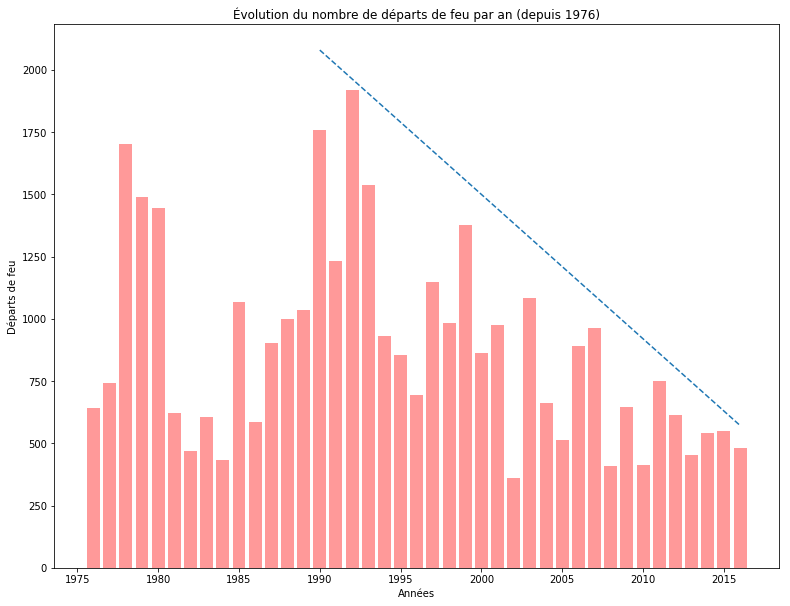

In [30]:
annee=base.groupby('Année').count()[['Numéro']].index.tolist()
figures=base.groupby('Année').count()['Numéro'].tolist()

fig, ax = plt.subplots()

fig.set_size_inches(13, 10)

bar_width = 0.8
opacity = 0.4

rects = ax.bar(annee, figures, bar_width,
                alpha=opacity, color='r',align='center')

ax.set_xlabel('Années')
ax.set_ylabel('Départs de feu')
ax.set_title('Évolution du nombre de départs de feu par an (depuis 1976)')

x = numpy.linspace(1990, 2016, 2000)
ax.plot(x, -58*x + 117500, linestyle='dashed')

plt.show()

On note une très nette diminution des départs de feu depuis les années 1990 jusqu'à aujourd'hui. Cela correspond au début des campagnes de sensbilisation dans la région (année 1990) et aux différents plans visant à réduire les départs de feu. C'est le nombre de mises à feu d'origine pastorale, fortement en baisse, qui explique pour beaucoup cette évolution puisqu'il a été divisé par sept entre 1996 et 2009 (source : _Office de l’environnement de la Corse_, __Info DFCI__, Décembre 2010, N°65). Une grande attention a été portée sur les activités pastorales afin de mieux former et de mieux accompagner les exploitants agricoles en Corse notamment vis-à-vis des risques d'incendie. Parallèlement la mise en place de zones de surveillance, la fermeture exceptionnelle de certains sites l'été ou des actions de senbilisations auprès du grand public ont permis de réduire les départs de feu au cours des dernières années.

#### Évolution du nombre d'hectares de forêt brûlés chaque année (depuis 1976)

Observe-t-on la même dynamique quant aux nombre d'hectares de forêt brûlés chaque année ?

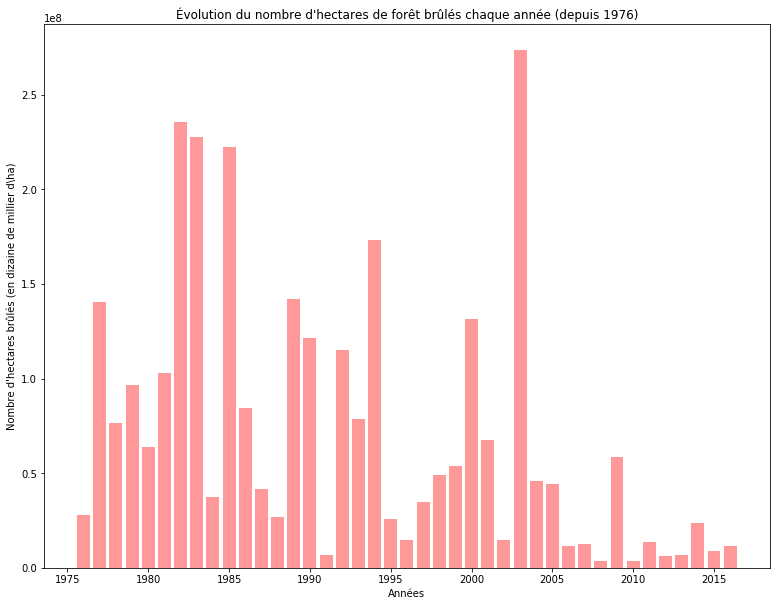

In [31]:
annee2=base.groupby('Année').count()[['Numéro']].index.tolist()
figures2=base.groupby(['Année'])['Surface parcourue (m2)'].sum().tolist()

fig2, ax2 = plt.subplots()

fig2.set_size_inches(13, 10)

bar_width = 0.8
opacity = 0.4

rects = ax2.bar(annee2, figures2, bar_width,
                alpha=opacity, color='r',align='center')

ax2.set_xlabel('Années')
ax2.set_ylabel('Nombre d\'hectares brûlés (en dizaine de millier d\ha)')
ax2.set_title('Évolution du nombre d\'hectares de forêt brûlés chaque année (depuis 1976)')

plt.show()

De même que le nombre de départs de feu, le nombre d'hectares brûlés par les incendies a eu tendance a baisser, exception faite de l'année 2003, année noire pour les incendies en Corse. Cette année-là ce seront 27 000 hectares de végétation qui seront ravagés par les flammes. En cause la canicule extraordinaire connue par l'Europe cette été là. Cela pose deux questions. Dans quelle mesure le nombre d'hectares brûlés durant une année est-il lié au nombre de départs de feu cette année-là ? Dans quelle mesure le nombre d'hectares brûles durant une année est-il lié au climat cette année-là (pluviométrie et température) ?

#### Évolution de la taille des feux

Il est aussi intéressant de regarder si au cours du temps et grâce aux moyens modernes la taille des feux a diminuée. D'abord il s'agit de classer l'ensemble des feux par année selon leur étendue (moins de 1ha, entre 1ha et 10ha, entre 10ha et 100ha et plus de 100ha).

In [32]:
ranges = [0,10000,100000,1000000,100000000]
first=base.loc[base['Année'] == 1976]
allyears_df=pandas.DataFrame(first.groupby(pandas.cut(first['Surface parcourue (m2)'], ranges)).count()['Année'])
allyears_df.rename(columns={"Année": 1976},inplace=True)
for year in range(1977,2017):
    yearly=base.loc[base['Année'] == year]
    yearly_df=pandas.DataFrame(yearly.groupby(pandas.cut(yearly['Surface parcourue (m2)'], ranges)).count()['Année'])
    yearly_df.rename(columns={"Année": year},inplace=True)
    allyears_df[year]=yearly_df

In [33]:
allyears_df

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Surface parcourue (m2),,,,,,,,,,,,,,,,,,,,,
"(0, 10000]",430,376,1193,998,998,354,177,308,248,472,...,838,355,571,368,648,522,398,438,473,410
"(10000, 100000]",179,293,426,415,396,193,190,211,144,427,...,103,48,58,37,86,81,42,79,57,62
"(100000, 1000000]",29,57,74,63,46,60,75,60,32,140,...,22,6,16,7,14,10,12,20,19,10
"(1000000, 100000000]",3,15,9,13,5,15,27,27,8,27,...,1,0,3,0,2,0,1,4,0,1


In [34]:
allyears_df.reset_index(inplace=True)
allyears_df.drop(columns=['Surface parcourue (m2)'],inplace=True)

In [35]:
allyears_df

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,430,376,1193,998,998,354,177,308,248,472,...,838,355,571,368,648,522,398,438,473,410
1,179,293,426,415,396,193,190,211,144,427,...,103,48,58,37,86,81,42,79,57,62
2,29,57,74,63,46,60,75,60,32,140,...,22,6,16,7,14,10,12,20,19,10
3,3,15,9,13,5,15,27,27,8,27,...,1,0,3,0,2,0,1,4,0,1


Une bonne manière de visualiser les différentes proportions est de faire un "camembert" pour chaque année. Ici le choix a été fait de les imprimer les uns à la suite des autres, ce qui permet de mieux les comparer.

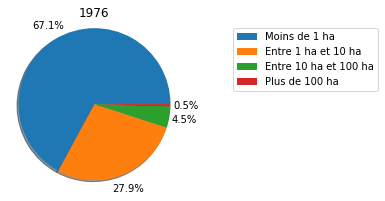

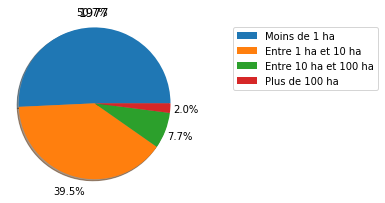

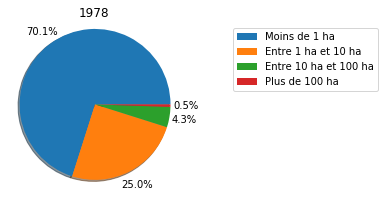

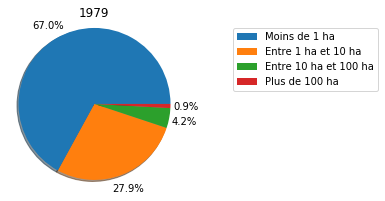

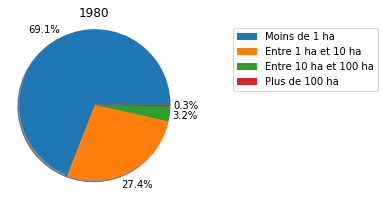

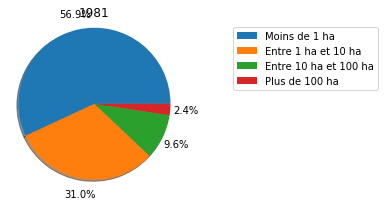

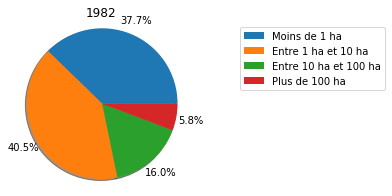

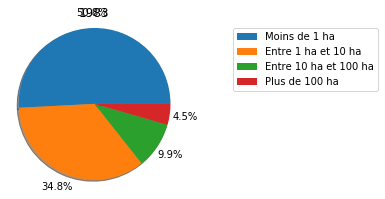

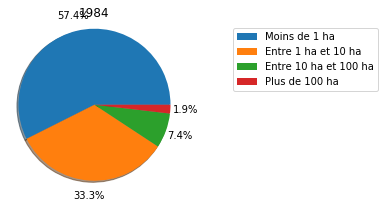

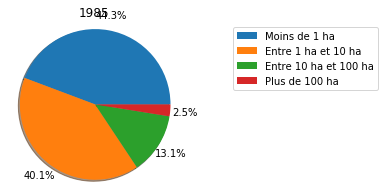

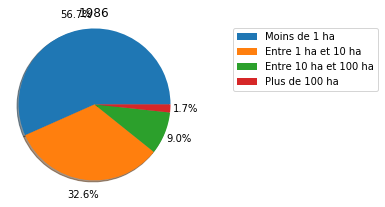

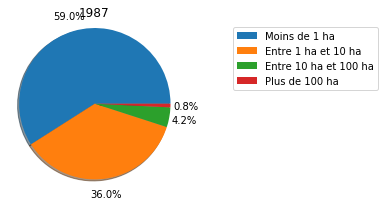

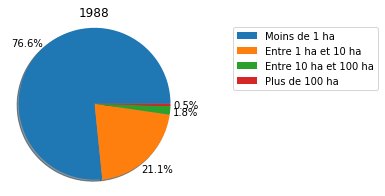

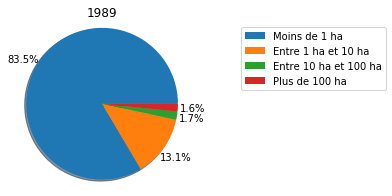

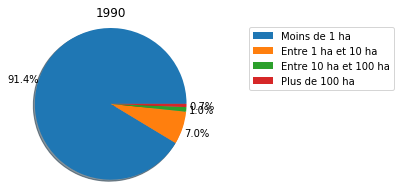

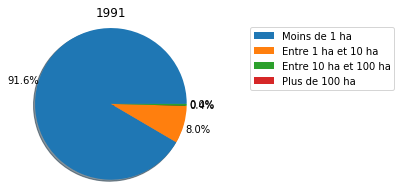

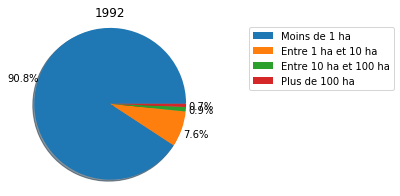

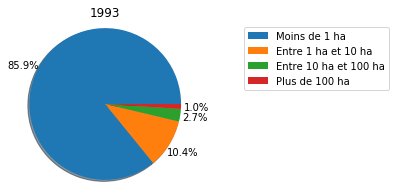

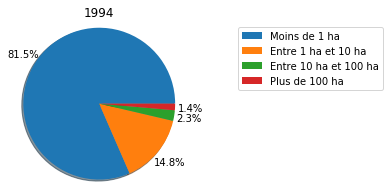

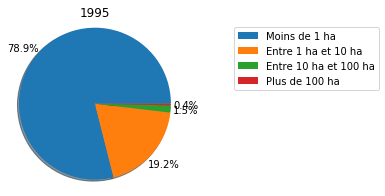

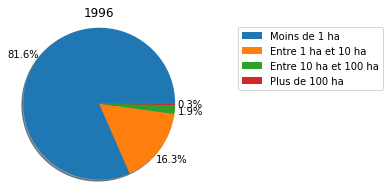

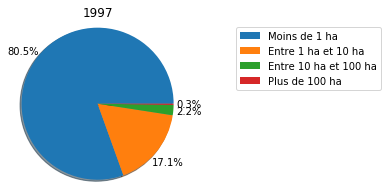

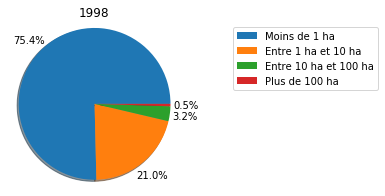

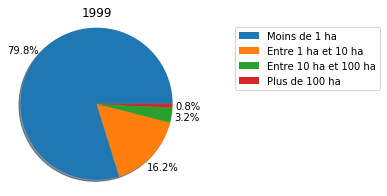

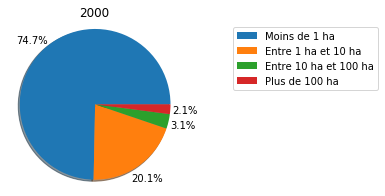

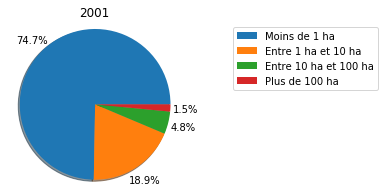

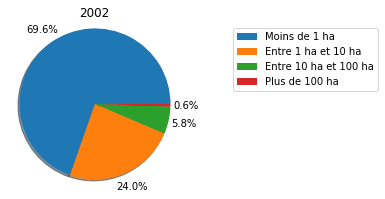

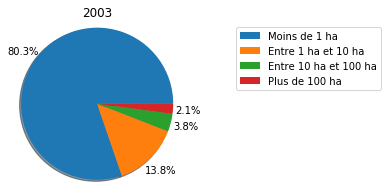

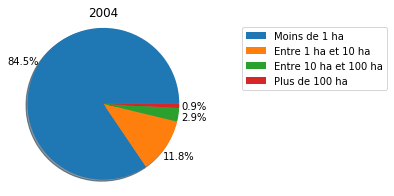

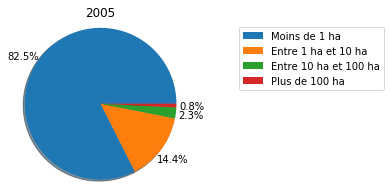

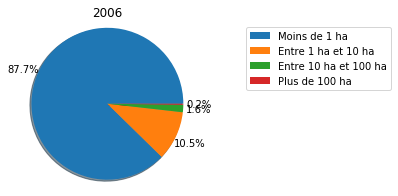

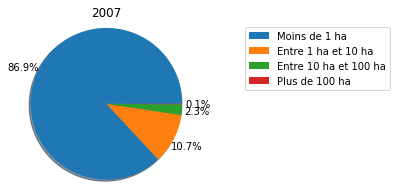

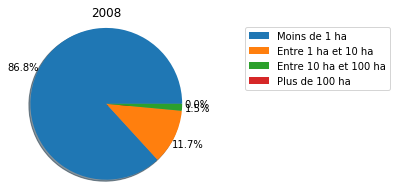

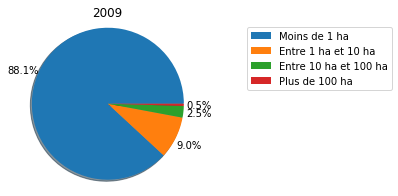

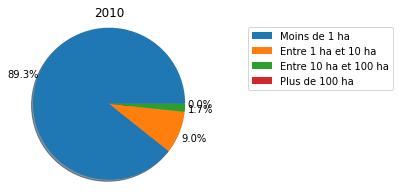

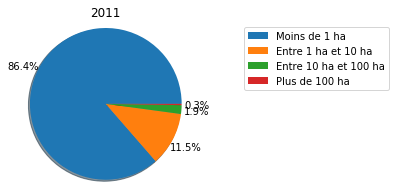

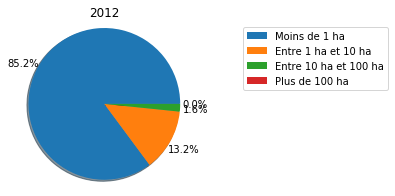

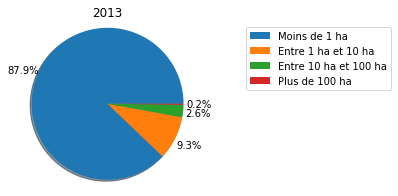

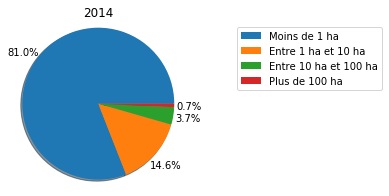

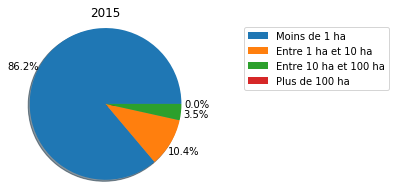

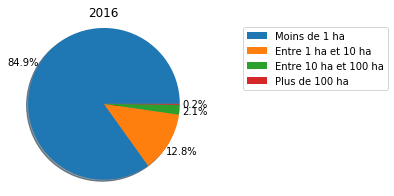

In [36]:
labels = 'Moins de 1 ha', 'Entre 1 ha et 10 ha', 'Entre 10 ha et 100 ha', 'Plus de 100 ha'

for year in range(1976,2017):
    fracs = allyears_df[year]

    fig,ax = plt.subplots(figsize=(3, 3))

    ax.pie(fracs, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=0, pctdistance=1.2)

    ax.axis('equal')

    ax.legend(labels,bbox_to_anchor=(1.3,1), loc="upper left")

    plt.title(year)
    
    plt.show()

On remarque que surtout à partir des années 1990 la proportion des "grands feux" (plus de 1ha) diminue nettement au profit des feux plus petits (moins de 1ha). Cela est du à la vigileance accrue et les moyens mis en oeuvre à partir des ces années-là. En effet les nouvraux moyens de surveillance permettent d'être alertés rapidement et de contenir plus rapidement le feu.

#### Hectares de végétation brûlés et départs de feu (depuis 1976)

Un seconde approche de notre base de données consiste à s'intéresser à la relation entre le nombre d'hectares parcourus par les flammes chaque année et le nombre de départs de feu la même année. On s'attend à avoir une corrélation nettement positive entre ces deux variables.

In [28]:
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

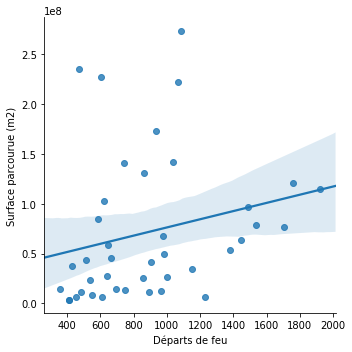

In [38]:
data_reg=pandas.concat([pandas.DataFrame(base.groupby(['Année'])['Surface parcourue (m2)'].sum()), pandas.DataFrame(base.groupby('Année').count()[['Numéro']])],axis=1,ignore_index=False,sort=True).rename(columns={'Numéro':'Départs de feu'})
sns.lmplot(x="Départs de feu", y="Surface parcourue (m2)", data=data_reg);


In [39]:
X=data_reg['Départs de feu']
X = sm.add_constant(X)
y=data_reg['Surface parcourue (m2)']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Surface parcourue (m2)   R-squared:                       0.054
Model:                                OLS   Adj. R-squared:                  0.030
Method:                     Least Squares   F-statistic:                     2.219
Date:                    Thu, 27 Dec 2018   Prob (F-statistic):              0.144
Time:                            15:14:48   Log-Likelihood:                -798.09
No. Observations:                      41   AIC:                             1600.
Df Residuals:                          39   BIC:                             1604.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

Comme nous l'avion prévu le coefficient est positif. Notre _p-value_ est cependant assez faible ce qui nous laisse penser que le coefficient est significatif a un niveau de confiance légèrement au dessus de ce que l'on prend d'ordinaire (5% ou 10%). Enfin le _R-squared_ est très faible ce qui porte à croire que le modèle nécessite l'ajout d'un certain nombre de variables. La surface parcourue par les flammes chaque année en Corse dépend donc positivement du nombre de feux cette année là mais surtout d'autres variables.

Cependant avant les années 1990, le système d'enregistrement des incendies n'était pas tout à fait au point avec un certain nombre d'oublis. Nous allons donc séparer les données avant 1990 et après 1990.

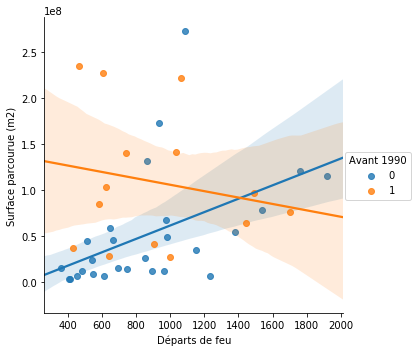

In [40]:
data_reg['Avant 1990'] = numpy.where(data_reg.index>=1990, 0, 1)
sns.lmplot(x="Départs de feu", y="Surface parcourue (m2)", hue="Avant 1990", data=data_reg);

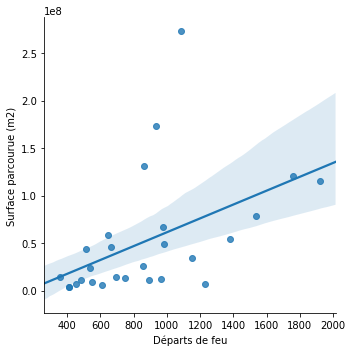

In [41]:
data_reg2=data_reg.loc['1990':'2016', :]
sns.lmplot(x="Départs de feu", y="Surface parcourue (m2)", data=data_reg2);

In [42]:
X=data_reg2[['Départs de feu']]
X=sm.add_constant(X)
y=data_reg2['Surface parcourue (m2)']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Surface parcourue (m2)   R-squared:                       0.228
Model:                                OLS   Adj. R-squared:                  0.197
Method:                     Least Squares   F-statistic:                     7.393
Date:                    Thu, 27 Dec 2018   Prob (F-statistic):             0.0117
Time:                            15:14:49   Log-Likelihood:                -519.23
No. Observations:                      27   AIC:                             1042.
Df Residuals:                          25   BIC:                             1045.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

Avant 1990, le signalement des feux était moins systématique. Depuis 1990, la surveillance s'est accrue. Il est donc normal que nos données soient moins fidèles avant cette date là. La régression sur les données "après 1990" est d'ailleurs plus concluante. Le _R-squared_ a augmenté même s'il reste faible. La _p-value_ du coefficient qui nous intéresse est inférieur au niveau de confiance 5% ce qui nous permet de conclure à une significativité de ce coefficient.

### Incendies et données climatologiques

#### Influence des précipitations sur les incendies

Dans cette partie nous allons tenter d'évaluer l'impact du climat sur les départs de feu et leur étendue. Pour cela nous allons utiliser l'indice __SPI__, Standardized Precipitation Index (McKee, 1993). Basé sur un historique de précipitation de longue durée, le SPI permet de quantifier l’écart des précipitations d’une période, déficit ou surplus, par rapport aux précipitations moyennes historiques de la période. Nous allons donc calculer pour chaque mois de notre période d'étude (donc depuis 1996) l'indice suivant :

$$SPI= \frac{P-P_m}{\sigma_p}$$

avec :

$P$ : la précipitation totale d'une période (en mm)

$P_m$ : la précipitation moyenne historique de la période (en mm)

$\sigma_p$ : écart-type historique des précipitations de la période

__L'indice $SPI$, indique une période de sécheresse s'il est bas.__

In [43]:
bmap=bma.drop(columns=['Température (°C)']).resample('M').sum().rename(columns={'Précipitations (3 heures)':'Précipitation moyenne du mois'})

In [44]:
bmap.head()

,Précipitation moyenne du mois
Date,
1996-02-29,73.2
1996-03-31,64.6
1996-04-30,58.2
1996-05-31,14.0
1996-06-30,16.4


In [45]:
bmap_mean=bmap.groupby(bmap.index.month).mean()
bmap_mean

,Précipitation moyenne du mois
Date,
1,61.395000
2,51.004762
3,51.404762
4,49.533333
5,52.542857
6,22.990476
7,7.428571
8,14.142857
9,53.466667


In [46]:
def get_mean(s):
    a=bmap_mean.at[s.month,'Précipitation moyenne du mois']
    return a

In [47]:
bmap.reset_index(inplace=True)
bmap['Moyenne historique (par mois)']=bmap['Date'].apply(get_mean)

In [70]:
bmap.head()

,Date,Précipitation moyenne du mois,Moyenne historique (par mois),Écart-type historique (par mois),SPI
0,1996-02-29,73.2,51.004762,35.235135,0.629918
1,1996-03-31,64.6,51.404762,29.645597,0.445099
2,1996-04-30,58.2,49.533333,26.952521,0.321553
3,1996-05-31,14.0,52.542857,63.459868,-0.607358
4,1996-06-30,16.4,22.990476,26.525619,-0.248457


In [71]:
bmap_sd=bmap
bmap_sd['Écart']=(bmap_sd['Précipitation moyenne du mois']-bmap_sd['Moyenne historique (par mois)'])**2

In [72]:
bmap_sd.head()

,Date,Précipitation moyenne du mois,Moyenne historique (par mois),Écart-type historique (par mois),SPI,Écart
0,1996-02-29,73.2,51.004762,35.235135,0.629918,492.628594
1,1996-03-31,64.6,51.404762,29.645597,0.445099,174.114308
2,1996-04-30,58.2,49.533333,26.952521,0.321553,75.111111
3,1996-05-31,14.0,52.542857,63.459868,-0.607358,1485.551837
4,1996-06-30,16.4,22.990476,26.525619,-0.248457,43.434376


In [73]:
sd_calc=bmap_sd.set_index('Date').drop(columns=['Précipitation moyenne du mois','Moyenne historique (par mois)'])
sd=sd_calc.groupby(sd_calc.index.month).mean()
sd['Écart']=sd['Écart']**(1/2)

In [74]:
sd

,Écart-type historique (par mois),SPI,Écart
Date,,,
1,29.518782,3.122502e-17,29.518782
2,35.235135,-1.903239e-16,35.235135
3,29.645597,1.480297e-16,29.645597
4,26.952521,1.797504e-16,26.952521
5,63.459868,-1.057355e-17,63.459868
6,26.525619,-1.083789e-16,26.525619
7,11.970684,-1.427430e-16,11.970684
8,15.583525,1.321694e-16,15.583525
9,37.427585,-2.114711e-16,37.427585


In [75]:
def get_sd(s):
    a=sd.at[s.month,'Écart']
    return a

In [76]:
bmap['Écart-type historique (par mois)']=bmap['Date'].apply(get_sd)
bmap.drop(columns=['Écart'],inplace=True)

In [77]:
bmap.head()

,Date,Précipitation moyenne du mois,Moyenne historique (par mois),Écart-type historique (par mois),SPI
0,1996-02-29,73.2,51.004762,35.235135,0.629918
1,1996-03-31,64.6,51.404762,29.645597,0.445099
2,1996-04-30,58.2,49.533333,26.952521,0.321553
3,1996-05-31,14.0,52.542857,63.459868,-0.607358
4,1996-06-30,16.4,22.990476,26.525619,-0.248457


In [78]:
bmap['SPI']=(bmap['Précipitation moyenne du mois']-bmap['Moyenne historique (par mois)'])/bmap['Écart-type historique (par mois)']

In [79]:
bmap.head()

,Date,Précipitation moyenne du mois,Moyenne historique (par mois),Écart-type historique (par mois),SPI
0,1996-02-29,73.2,51.004762,35.235135,0.629918
1,1996-03-31,64.6,51.404762,29.645597,0.445099
2,1996-04-30,58.2,49.533333,26.952521,0.321553
3,1996-05-31,14.0,52.542857,63.459868,-0.607358
4,1996-06-30,16.4,22.990476,26.525619,-0.248457


In [80]:
spi=bmap.set_index('Date').drop(columns=['Précipitation moyenne du mois','Moyenne historique (par mois)','Écart-type historique (par mois)'])
spi['Mois']=spi.index.month
spi['Année']=spi.index.year
spi=spi.reset_index().drop(columns=['Date'])
spi=spi.set_index(['Année', 'Mois'])
spi.head()

SPI
Année Mois          
1996  2     0.629918
      3     0.445099
      4     0.321553
      5    -0.607358
      6    -0.248457

In [81]:
base

,Année,Numéro,Type de feu,Departement,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,Alerte,Origine de l'alerte,Surface parcourue (m2),Nom de la commune (Code INSEE)
0,1976,1172,0,2A,2A209,Peri,PERI,T04D25,1976-04-04 16:10:00,NaN,2000,Peri (2A209)
1,1976,1719,0,2B,2B218,Piedicorte-di-Gaggio,PIEDICORTE DI GAGGIO,T05Q14,1976-09-20 13:35:00,NaN,20000,Piedicorte-di-Gaggio (2B218)
2,1976,1266,0,2A,2A041,Bonifacio,BONIFACIO,T08K17,1976-07-26 14:04:00,NaN,9000,Bonifacio (2A041)
3,1976,1518,0,2B,2B261,Rogliano,ROGLIANO,T01P18,1976-08-25 11:05:00,NaN,15000,Rogliano (2B261)
4,1976,1718,0,2B,2B030,Barrettali,BARRETTALI,T01M16,1976-09-20 13:30:00,NaN,30000,Barrettali (2B030)
5,1976,1265,0,2A,2A247,Porto-Vecchio,PORTO VECCHIO,T07C15,1976-07-26 14:04:00,NaN,2000,Porto-Vecchio (2A247)
6,1976,1519,0,2B,2B079,Castello-di-Rostino,CASTELLO DI ROSTINO,T03T13,1976-08-25 12:40:00,NaN,95000,Castello-di-Rostino (2B079)
7,1976,1264,0,2B,2B134,Île-Rousse (L'),ILE ROUSSE L,T02S26,1976-07-26 13:30:00,NaN,1000,Île-Rousse (L') (2B134)
8,1976,1182,0,2B,2B313,San-Nicolao,SAN NICOLAO,T03D21,1976-05-19 02:00:00,NaN,30000,San-Nicolao (2B313)
9,1976,1717,0,2B,2B096,Corte,CORTE,T03B07,1976-09-20 13:00:00,NaN,20000,Corte (2B096)


In [82]:
bbisa=base[(base.Alerte >= datetime(1996, 1, 30, 0, 0)) & (base.Departement == '2A')].sort_values(by=['Alerte']).reset_index(drop=True)
bbisa=bbisa.set_index('Alerte')
bbisa['Mois']=bbisa.index.month
bdepa=bbisa.groupby(['Année', 'Mois'],as_index=False).count()
bdepa=bdepa.drop(columns=['Type de feu','Departement','Code INSEE','Nom de la commune (Code INSEE)','Lieu-dit','Code du carreau DFCI','Origine de l\'alerte','Surface parcourue (m2)']).rename(columns={'Numéro':'Nombre de départs de feu'})
bdepa=bdepa.set_index(['Année', 'Mois'])

In [83]:
bdepa.head()

Nombre de départs de feu  Commune
Année Mois                                   
1996  3                            2        2
      4                           18       18
      5                            2        2
      6                           31       31
      7                           96       96

In [84]:
bsura=bbisa.groupby(['Année', 'Mois'],as_index=False).sum()
bsura=bsura.drop(columns=['Type de feu','Numéro','Origine de l\'alerte']).rename(columns={'Surface parcourue (m2)':'M2 dévastés'})
bsura=bsura.set_index(['Année', 'Mois'])

In [85]:
bsura.head()

M2 dévastés
Année Mois             
1996  3           23000
      4          146880
      5            4050
      6          779950
      7         3180575

In [86]:
bclima=pandas.concat([spi, bdepa, bsura], ignore_index=False, axis=1, sort=False).drop(columns={'Commune'}).dropna()

Voilà donc notre base avec pour chaque mois de chaque année de notre période d'étude l'indice SPI, le nombre de départs de feu ainsi que les $m^2$ dévastés.

In [65]:
bclima.head()

SPI  Nombre de départs de feu  M2 dévastés
Année Mois                                                 
1996  3     0.445099                       2.0      23000.0
      4     0.321553                      18.0     146880.0
      5    -0.607358                       2.0       4050.0
      6    -0.248457                      31.0     779950.0
      7    -0.035802                      96.0    3180575.0

#### Influence de la sécheresse sur le nombre de départs de feu

Commençons par évaluer l'impact du $SPI$ sur la nombre de départs de feu.

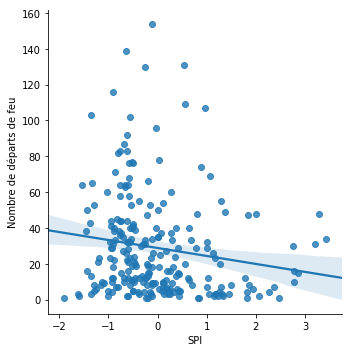

In [66]:
sns.lmplot(x="SPI", y="Nombre de départs de feu", data=bclima)

Plus le SPI est élevé, plus l'environnement est humide, il est donc normal d'observer des départs de feu moindre en période humide.

In [67]:
X=bclima[['SPI']]
X=sm.add_constant(X)
y=bclima[['Nombre de départs de feu']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Nombre de départs de feu   R-squared:                       0.024
Model:                                  OLS   Adj. R-squared:                  0.020
Method:                       Least Squares   F-statistic:                     5.766
Date:                      Thu, 27 Dec 2018   Prob (F-statistic):             0.0171
Time:                              15:14:50   Log-Likelihood:                -1123.3
No. Observations:                       236   AIC:                             2251.
Df Residuals:                           234   BIC:                             2258.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Une analyse plus poussée nous prouve que le coefficient est en effet négatif. Sa _p-value_ est en dessous du seuil de 5% donc on conclue à la significativité de ce coefficient. Cependant on remarque qu'encore une fois notre _R-sqaured_ est très faible. Ici cela ne nous étonne guère : nous avons vu que les départs de feu ont pour au moins 90% une cause humaine. Si la sécheresse de la végétation a un effet catalyseur du départ de feu, nous venons de le montrer, le départ de feu dépend en grande partie de facteurs humains !

#### Influence de la sécheresse sur les hectares dévastés

Évaluons maintenant l'influence de l'indice $SPI$ sur la surface dévastée par les flammes. Nous ajouterons pour plus de précisions une variable de contrôle, le nombre de départs de feu par année.

In [68]:
X=bclima[['SPI','Nombre de départs de feu']]
X=sm.add_constant(X)
y=bclima['M2 dévastés']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            M2 dévastés   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     17.18
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           1.10e-07
Time:                        15:14:50   Log-Likelihood:                -3939.9
No. Observations:                 236   AIC:                             7886.
Df Residuals:                     233   BIC:                             7896.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Le coefficient de la variable de contrôle "Nombre de départs de feu" est positif et significatif (comme nous l'avons vu tout à l'heure) puisque sa _p-value_ est en dessous de 5%. En revanche nous ne pouvons pas vraiment tirer de conclusions quant à l'indice $SPI$. Sa _p-value_ est très élevée et son coefficient positif, ce qui est contre-intuitif. Nous pouvons à ce stade proposer deux remarques :

 - La première est que notre indice ne prend en compte que les précipitations du mois, non la température qui peut fortement influencer la sécheresse des végétaux. Un autre indice, le $SPEI$ (Standardised Precipitation Evapotranspiration Index) prend en compte la température et d'autres informations climatiques (taux d'évaporation etc.) pour avoir une idée plus précise de la sécheresse des végétaux à une période donnée. Plus précis et plus pertinent il est aussi plus compliqué à calculer. Un package sous R nous permet de le calculer mais faute de temps et de main-d'oeuvre cette prolongation a du être abandonnée.
 - La deuxième c'est le choix de la période. Nous avons calculé pour chaque mois l'indice $SPI$. Nous aurions du pour chaque jour donné, calculer l'indice en fonction des précipitations du mois dernier. En effet si le feu est au début du mois, que le mois d'avant a été très sec mais que le mois en cours a été très pluvieux il y a de forte chance pour que l'incendie se propage rapidement alors même que l'indice $SPI$ du mois est très élevé.

#### Influence du vent sur les incendies

Dans cette sous-partie, nous allons essayer de montrer que le vent a une influence considérable sur les incendies en Corse. En effet, les périodes de vent violents s'accompagne toujours de nombreux incendies sur l'île et ces derniers deviennent souvent hors de contrôle.

In [144]:
bmav=bma.drop(columns=['Température (°C)','Précipitations (3 heures)'])
bbisa2=base[(base.Alerte >= datetime(1996, 1, 30, 0, 0)) & (base.Departement == '2A')].sort_values(by=['Alerte']).reset_index(drop=True)
bbisa2=bbisa2.drop(columns=['Année','Numéro','Type de feu','Departement','Code INSEE','Commune','Lieu-dit','Code du carreau DFCI','Origine de l\'alerte','Nom de la commune (Code INSEE)'])

In [146]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [147]:
def get_vv(s):
    a=bmav.at[nearest(bmav.index,s),'Vitesse du vent (m/s)']
    return a

In [148]:
bbisa2['Vitesse du vent (m/s)'] = bbisa2['Alerte'].apply(get_vv)

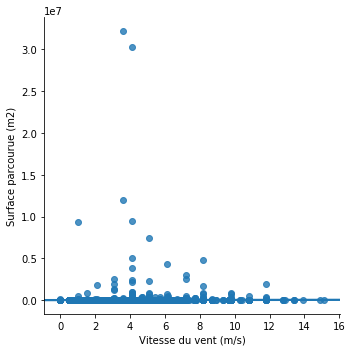

In [151]:
sns.lmplot(x="Vitesse du vent (m/s)", y="Surface parcourue (m2)", data=bbisa2)

In [153]:
X=bbisa2[['Vitesse du vent (m/s)']]
X=sm.add_constant(X)
y=bbisa2[['Surface parcourue (m2)']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Surface parcourue (m2)   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.2658
Date:                    Thu, 27 Dec 2018   Prob (F-statistic):              0.606
Time:                            19:57:31   Log-Likelihood:            -1.0050e+05
No. Observations:                    6824   AIC:                         2.010e+05
Df Residuals:                        6822   BIC:                         2.010e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

On voit ici que notre régression linéaire donne peu de résultat et pour cause il ne semble pas que la relation entre la vitesse du vent et la propagation des feux soit linéaire. Il semblerait que jusqu'à 4 m/s le vent ait une influence positive sur la propagation du feu mais qu'au delà de ce seuil sa puissance soit négative.

Nous aurions pu ici contrôler avec une variable température/précipitation si celle que nous avions construite avec été bonne. De plus notre régression aurait été meilleure si nous avions pu approximé nos valeurs au moyen d'un polynôme.

### Étude de la propagation des feux en zone forestière

Dans cette partie nous voulons évaluer l'influence de la flore sur la propagation des feux de forêts en Corse. Pour cela nous avons la liste des forêts territoriales en Corse ainsi que les proportions de population de chaque essence dans chaque forêt.

In [16]:
base_foret.head()

NameError: name 'base_foret' is not defined

In [17]:
base_foret_bis=base_foret.drop(columns=['Surface cadastrale (ha)'])
base_foret_bis.head()

NameError: name 'base_foret' is not defined

In [89]:
base_foret2.head()

,Pin laricio de Corse,Hêtre,Divers,Aulne vert,Pin maritime,Aulne glutineux,Arbousier,Chêne vert,Chêne liège,Bouleau verruqueux,Sapin pectiné,Aulne odorant,Cyprès Arizona
Nom de la forêt,,,,,,,,,,,,,
AÏTONE,64.0,7.0,21,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAVELLA-SAMBUCU,35.0,NaN,3,NaN,15.0,10.0,33,4,NaN,NaN,NaN,NaN,NaN
CHIAVARI,NaN,NaN,72,NaN,3.0,5.0,NaN,17,3.0,NaN,NaN,NaN,NaN
COSCIONE,NaN,97.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FANGO,11.0,NaN,NaN,NaN,3.0,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN


In [90]:
foret_merge = pandas.merge(base_foret_bis, base_foret2, left_on='Nom de la forêt', right_index=True, how='left', sort=False)
foret_merge = foret_merge.set_index('Communes de situation')
foret_merge.head()

,Nom de la forêt,Pin laricio de Corse,Hêtre,Divers,Aulne vert,Pin maritime,Aulne glutineux,Arbousier,Chêne vert,Chêne liège,Bouleau verruqueux,Sapin pectiné,Aulne odorant,Cyprès Arizona
Communes de situation,,,,,,,,,,,,,,
Evisa,AÏTONE,64.0,7.0,21,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cristinacce,AÏTONE,64.0,7.0,21,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sari-Solenzara,BAVELLA-SAMBUCU,35.0,NaN,3,NaN,15.0,10.0,33,4,NaN,NaN,NaN,NaN,NaN
Zonza,BAVELLA-SAMBUCU,35.0,NaN,3,NaN,15.0,10.0,33,4,NaN,NaN,NaN,NaN,NaN
Quenza,BAVELLA-SAMBUCU,35.0,NaN,3,NaN,15.0,10.0,33,4,NaN,NaN,NaN,NaN,NaN


In [91]:
com=__builtins__.list(set(base_foret['Communes de situation']))

In [93]:
base_ft=base[base['Commune'].isin(com)].reset_index()
base_ft=base_ft[['Commune','Surface parcourue (m2)']]

In [96]:
base_merge = pandas.merge(base_ft, foret_merge, left_on='Commune', right_index=True, how='left', sort=False)
base_merge = base_merge.fillna(0).drop(columns={'Commune','Nom de la forêt'})

Voilà notre base construite. Nous avons dans une colonne la surface parcourue par le feu et dans les autres les propostions de population de chaque espèce.

In [97]:
base_merge.head()

,Surface parcourue (m2),Pin laricio de Corse,Hêtre,Divers,Aulne vert,Pin maritime,Aulne glutineux,Arbousier,Chêne vert,Chêne liège,Bouleau verruqueux,Sapin pectiné,Aulne odorant,Cyprès Arizona
0,2000,9.0,0.0,1.0,0.0,61.0,0.0,20.0,8.0,1.0,0.0,0.0,0.0,0.0
1,20000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20000,92.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000,92.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X=base_merge[['Pin laricio de Corse','Hêtre','Divers','Aulne vert','Pin maritime','Aulne glutineux','Arbousier','Chêne vert','Chêne liège','Bouleau verruqueux','Sapin pectiné','Aulne odorant','Cyprès Arizona']]
X=sm.add_constant(X)
y=base_merge['Surface parcourue (m2)']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Surface parcourue (m2)   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.251
Date:                    Thu, 27 Dec 2018   Prob (F-statistic):              0.235
Time:                            15:18:50   Log-Likelihood:            -1.2218e+05
No. Observations:                    7840   AIC:                         2.444e+05
Df Residuals:                        7826   BIC:                         2.445e+05
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

D'abord nous observons un _R-squared_ de 0 : sans variable de contrôle convenable pour les conditions météorologiques notre modèle explique peu nore jeu de données. Toutefois la _p-value_ de deux essences est inférieure au seuil de 5% donc nous pouvons conclure à la significativité des coefficients. Il s'agit du __Cyprès Arizona__ et du __Sapin pectiné__ ce qui porte à croire que la présence de ces essences favorise la propagation. Toutefois notre jeu de données portant sur peu de forêts nous ne pouvons dire que ce sont les essences qui brûlent le mieux. Si la ou les forêts avec ces essences sont aussi les moins bien surveillées du fait de leur éloignement alors il est normal que ces coefficients soient significatifs.

### Incendies et données socio-économiques

Dans cette partie nous allons voir si les données socio-économiques des communes ont une influence sur le nombre de départs de feu.

In [29]:
base.sort_values(by=['Nom de la commune (Code INSEE)']);

In [50]:
data_fire=pandas.DataFrame(base.groupby(['Nom de la commune (Code INSEE)'])['Numéro'].count())
data_fire.head()

,Numéro
Nom de la commune (Code INSEE),
Afa (2A001),191
Aghione (2B002),127
Aiti (2B003),7
Ajaccio (2A004),1869
Alando (2B005),12


In [31]:
data_reg3=pandas.concat([data_fire,base_INSEE],axis=1,ignore_index=False,sort=True).rename(columns={'Numéro':'Départs de feu'})

Voilà notre base de données avec en index la commune et son code INSEE ainsi que dans les colonnes les données socio-économiques qui nous intéressent.

In [32]:
data_reg3.dropna(inplace=True)
data_reg3.head()

,Départs de feu,Population en 2015,Densité de la population (nombre d'habitants au km²) en 2015,Superficie (en km²),Nombre de ménages en 2015,Nombre total de logements en 2015,"Médiane du revenu disponible par unité de consommation en 2015, en euros",Taux d'activité des 15 à 64 ans en 2015,Taux de chômage des 15 à 64 ans en 2015
Afa (2A001),191.0,3090.0,261.0,11.8,1251.0,1444.0,23915,78.8,9.8
Aghione (2B002),127.0,236.0,7.0,33.9,93.0,138.0,14085,65.6,17.2
Aiti (2B003),7.0,33.0,2.7,12.2,20.0,67.0,,42.9,0.0
Ajaccio (2A004),1869.0,68462.0,834.6,82.0,28962.0,33401.0,20235,73.0,10.8
Alando (2B005),12.0,38.0,12.5,3.1,12.0,53.0,,80.0,0.0


#### Population et incendies

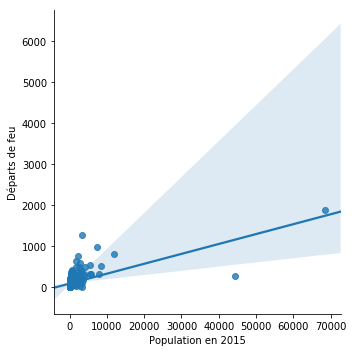

In [33]:
sns.lmplot(x="Population en 2015", y="Départs de feu", data=data_reg3)

Cette première régression est parasitée par deux communes avec une population très importe par rapport aux autres, Ajaccio et Bastia. Nous pouvons donc les enlever de notre champs d'étude sans perte de généralité.

In [34]:
data_reg3bis=data_reg3.drop(['Ajaccio (2A004)', 'Bastia (2B033)'])

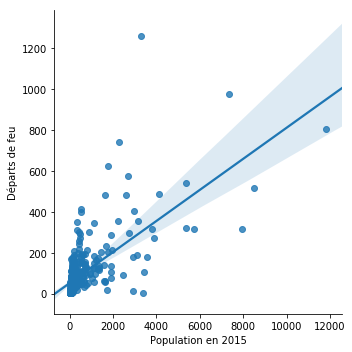

In [35]:
sns.lmplot(x="Population en 2015", y="Départs de feu", data=data_reg3bis)

In [36]:
X=data_reg3bis[['Population en 2015']]
X=sm.add_constant(X)
y=data_reg3bis['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     318.3
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           3.88e-51
Time:                        14:28:14   Log-Likelihood:                -2128.3
No. Observations:                 353   AIC:                             4261.
Df Residuals:                     351   BIC:                             4268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.2670      5

Premièrement notre _R-squared_ est correct puisqu'il est de $0,476$ ce qui nous laisse espérer un modèle cohérent. Ensuite il semble que la population d'une commune a un impact significatif sur les départs de feu : la _p-value_ est extrêmement proche de 0. Cependant nous avons ici un bias de variable omise : en effet plus une commune est peuplée plus elle est grande donc a de chance de voir des départs de feu. Il faut donc faire une seconde régression avec comme variable de contrôle la superficie de la commune.

In [51]:
X=data_reg3bis[['Population en 2015','Superficie (en km²)']]
X=sm.add_constant(X)
y=data_reg3bis['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           3.95e-40
Time:                        14:41:46   Log-Likelihood:                -1263.2
No. Observations:                 208   AIC:                             2532.
Df Residuals:                     205   BIC:                             2542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  23.1355    

Notre _R-squared_ a augmenté ce qui est de bon augure. Nos deux coefficients sont significatifs puisque leur _p-value_ est très proche de 0. L'ajout de cette variable de contrôle nous permet d'obtenir de la précision concernant le coefficient qui lie "population" et "départs de feu", celui-ci est très légèrement inférieur à ce que nous avions précédemment. Ainsi à taille égale, une commune plus peuplée verra le nombre de départs de feu augmenter ce qui nous renseigne sur un élément fondamental : __la présence humaine sur un territoire augmente le nombre de départs de feu__.Par ailleurs le coefficient "Superficie" est positif ce qui ne nous étonne guère.

#### Revenus et incendies

In [37]:
data_reg4=data_reg3bis
data_reg4['Médiane du revenu disponible par unité de consommation en 2015, en euros'].replace('',numpy.nan, inplace=True)
data_reg4.dropna(subset=['Médiane du revenu disponible par unité de consommation en 2015, en euros'],inplace=True)

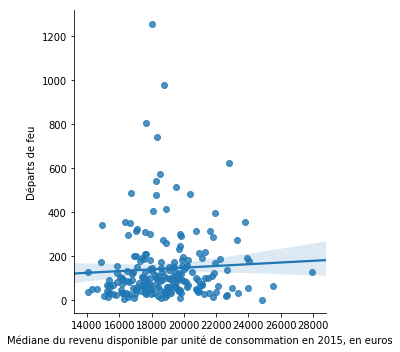

In [38]:
sns.lmplot(x="Médiane du revenu disponible par unité de consommation en 2015, en euros", y="Départs de feu", data=data_reg4)

In [53]:
X=data_reg4[['Médiane du revenu disponible par unité de consommation en 2015, en euros']]
X=sm.add_constant(X)
y=data_reg4['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6242
Date:                Fri, 28 Dec 2018   Prob (F-statistic):              0.430
Time:                        14:50:01   Log-Likelihood:                -1354.9
No. Observations:                 208   AIC:                             2714.
Df Residuals:                     206   BIC:                             2720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Notre _R-squared_ est trop faible pour pouvoir conclure quoi que ce soit, chose qui se voyait aisément sur le graphique. La _p-value_ de notre coefficient est plus élevée que les seuils normalement retenus. Nous ne pouvons donc pas conclure à une influence significative du revenu sur le nombre de départs de feu.

#### Densité et incendies

In [39]:
data_reg5=data_reg4
data_reg5['Densité de la population (nombre d\'habitants au km²) en 2015'].replace('',numpy.nan, inplace=True)
data_reg5.dropna(subset=['Densité de la population (nombre d\'habitants au km²) en 2015'],inplace=True)

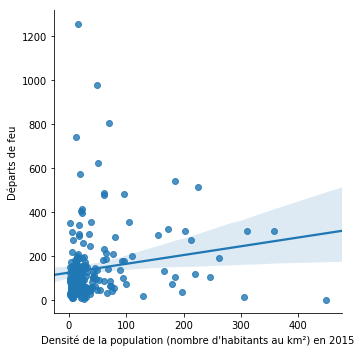

In [40]:
sns.lmplot(x="Densité de la population (nombre d\'habitants au km²) en 2015", y="Départs de feu", data=data_reg5)

In [54]:
X=data_reg5[['Densité de la population (nombre d\'habitants au km²) en 2015']]
X=sm.add_constant(X)
y=data_reg5['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.509
Date:                Fri, 28 Dec 2018   Prob (F-statistic):             0.0199
Time:                        14:53:22   Log-Likelihood:                -1352.5
No. Observations:                 208   AIC:                             2709.
Df Residuals:                     206   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Bien que notre _R-squared_ soit faible notre coefficient semble être significatif ce qui colle bien avec ce que nous avons trouvé plus haut. Nous ne nous attarderons cependant pas plus sur cette régression puisque nous avons déjà étudié l'influence de la population et de la superficie précédemment.

#### Nombre de ménages et incendies

In [43]:
data_reg7=data_reg5
data_reg7['Nombre de ménages en 2015'].replace('',numpy.nan, inplace=True)
data_reg7.dropna(subset=['Nombre de ménages en 2015'],inplace=True)

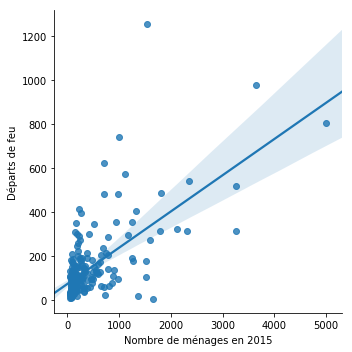

In [44]:
sns.lmplot(x="Nombre de ménages en 2015", y="Départs de feu", data=data_reg7)

In [55]:
X=data_reg7[['Nombre de ménages en 2015']]
X=sm.add_constant(X)
y=data_reg7['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           3.60e-27
Time:                        14:56:37   Log-Likelihood:                -1296.2
No. Observations:                 208   AIC:                             2596.
Df Residuals:                     206   BIC:                             2603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Nous obtenons un coefficient plus élevé qu'avec la régression portant sur la population ce qui semble tout à fait cohérent : un ménage représentant en moyenne plus d'une personne !

In [56]:
X=data_reg7[['Nombre de ménages en 2015','Superficie (en km²)']]
X=sm.add_constant(X)
y=data_reg7['Départs de feu']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Départs de feu   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     146.6
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.92e-40
Time:                        14:59:57   Log-Likelihood:                -1262.9
No. Observations:                 208   AIC:                             2532.
Df Residuals:                     205   BIC:                             2542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Le _R-squared_ de ce modèle est identique au _R-squared_ obtenu avec le modèle prenant en compte la population et non le nombre de ménage. C'est donc essentiellement le facteur "population" de la variable "nombre de ménages" qui influence le nombre de départs de feu et en aucun cas un facteur explicatif de type "nombre d'équipements" (barbecue etc.).

#### Taux d'activité et incendies

In [45]:
data_reg8=data_reg7
data_reg8['Taux d\'activité des 15 à 64 ans en 2015'].replace('',numpy.nan, inplace=True)
data_reg8.dropna(subset=['Taux d\'activité des 15 à 64 ans en 2015'],inplace=True)

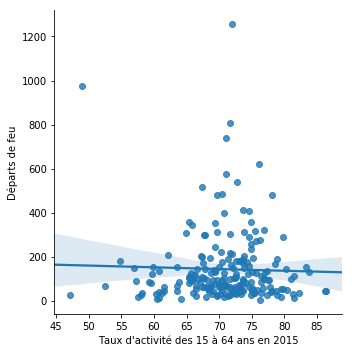

In [46]:
sns.lmplot(x="Taux d\'activité des 15 à 64 ans en 2015", y="Départs de feu", data=data_reg8)

Il ne semble pas y avoir de corrélation claire entre nos deux variables.

#### Taux de chômage et incendies

In [47]:
data_reg8=data_reg7
data_reg8['Taux de chômage des 15 à 64 ans en 2015'].replace('',numpy.nan, inplace=True)
data_reg8.dropna(subset=['Taux de chômage des 15 à 64 ans en 2015'],inplace=True)

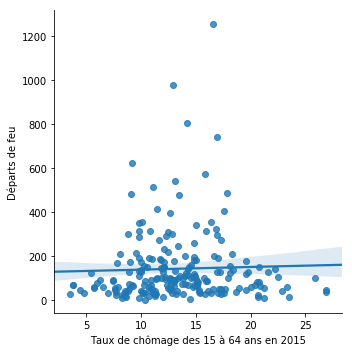

In [48]:
sns.lmplot(x="Taux de chômage des 15 à 64 ans en 2015", y="Départs de feu", data=data_reg8)

De même qu'avec le taux d'activité, il ne semble y avoir aucune corrélation évidente ici.

## Conclusion

Nous avons distingué au début de notre étude deux aspects de l'incendie : le départ du feu et sa propagation.

Nous avons vu que le départ dépend en grande partie de facteurs humains. L'activité humaine est déterminante puisque plus une population est peuplée plus elle connait d'incendies. Toutefois l'analyse des données socio-économiques n'a pas révélé plus que cela.

Pour ce qui est de la propagation des feux, elle tient vraisemblablement à plusieurs choses que nous avons pu mettre en avant. D'abord l'importance du climat de la période, une végétation qui a reçu peu d'eau et beaucoup de soleil est beaucoup plus propice à la propagation de l'incendie. Ensuite le vent a son importance. S'il empêche une propagation importante s'il est trop fort a plus faible dose il attise les flammes et peut causer de grands dégats. Enfin la végétation a son importance et certaines essences, nous l'avons vu, brûlent plus facilement que d'autres.